In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sklearn
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor








In [2]:

#нейронные сети
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df_bp = pd.read_excel('C:/Users/olgaa/Downloads/vkr/data/X_bp.xlsx', index_col=0) 
df_nup = pd.read_excel('C:/Users/olgaa/Downloads/vkr/data/X_nup.xlsx', index_col=0)

In [4]:
df_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [5]:
df_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [6]:
df = df_bp.join(df_nup)
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [7]:
df.shape[0] #колличество строк

1023

In [8]:
df.shape[1] #количество столбцов

13

In [9]:
df.info() #Информация о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [41]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1017.000000       1014.000000   
mean                          2.925257       1974.755152   
std                           0.894926         71.156559   
min                           0.547391       1784.482245   
25%                           2.319166       1924.134147   
50%                           2.906383       1977.450684   
75%                           3.550392       2020.969209   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1021.000000                  1009.000000   
mean              737.721905                   110.558048   
std               326.773868                    26.846173   
min                 2.436909                    38.668500   
25%               498.596429                    92.618011   
50%               738.957167                   110.564840   
75%               957.395628                   129.442140   
max              1649.415706                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1021.000000               1015.000000   
mean                         22.241680                285.949508   
std                           2.371843                 39.510454   
min                          15.695894                179.374391   
25%                          20.608609                259.211711   
50%                          22.230744                285.896812   
75%                          23.961702                312.766177   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1021.000000                           1017.000000   
mean                      480.944261                             73.311050   
std                       278.670119                              3.051631   
min                         0.603740                             65.553336   
25%                       266.492473                             71.252628   
50%                       451.313045                             73.264735   
75%                       692.271085                             75.336532   
max                      1291.340115                             81.417126   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1012.000000              1015.000000   
mean                     2465.769701               218.081180   
std                       468.005025                57.908978   
min                      1250.392802                63.685698   
25%                      2139.815229               179.766002   
50%                      2457.959767               219.179155   
75%                      2760.163022               257.106878   
max                      3705.672523               359.052220   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1019.000000        1002.000000  
mean            44.252199     6.870464          57.412683  
std             45.015793     2.526921          11.259067  
min              0.000000     0.000000          27.272928  
25%              0.000000     5.077596          50.133828  
50%              0.000000     6.908628          57.516472  
75%             90.000000     8.583586          64.840898  
max             90.000000    13.732404          86.012427

In [40]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1017.0     2.925257    0.894926   
Плотность, кг/м3                      1014.0  1974.755152   71.156559   
модуль упругости, ГПа                 1021.0   737.721905  326.773868   
Количество отвердителя, м.%           1009.0   110.558048   26.846173   
Содержание эпоксидных групп,%_2       1021.0    22.241680    2.371843   
Температура вспышки, С_2              1015.0   285.949508   39.510454   
Поверхностная плотность, г/м2         1021.0   480.944261  278.670119   
Модуль упругости при растяжении, ГПа  1017.0    73.311050    3.051631   
Прочность при растяжении, МПа         1012.0  2465.769701  468.005025   
Потребление смолы, г/м2               1015.0   218.081180   57.908978   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1019.0     6.870464    2.526921   
Плотность нашивки                     1002.0    57.412683   11.259067   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.547391     2.319166     2.906383   
Плотность, кг/м3                      1784.482245  1924.134147  1977.450684   
модуль упругости, ГПа                    2.436909   498.596429   738.957167   
Количество отвердителя, м.%             38.668500    92.618011   110.564840   
Содержание эпоксидных групп,%_2         15.695894    20.608609    22.230744   
Температура вспышки, С_2               179.374391   259.211711   285.896812   
Поверхностная плотность, г/м2            0.603740   266.492473   451.313045   
Модуль упругости при растяжении, ГПа    65.553336    71.252628    73.264735   
Прочность при растяжении, МПа         1250.392802  2139.815229  2457.959767   
Потребление смолы, г/м2                 63.685698   179.766002   219.179155   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.077596     6.908628   
Плотность нашивки                       27.272928    50.133828    57.516472   

                                              75%          max  
Соотношение матрица-наполнитель          3.550392     5.314144  
Плотность, кг/м3                      2020.969209  2161.565216  
модуль упругости, ГПа                  957.395628  1649.415706  
Количество отвердителя, м.%            129.442140   181.828448  
Содержание эпоксидных групп,%_2         23.961702    28.955094  
Температура вспышки, С_2               312.766177   386.067992  
Поверхностная плотность, г/м2          692.271085  1291.340115  
Модуль упругости при растяжении, ГПа    75.336532    81.417126  
Прочность при растяжении, МПа         2760.163022  3705.672523  
Потребление смолы, г/м2                257.106878   359.052220  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.583586    13.732404  
Плотность нашивки                       64.840898    86.012427

In [11]:
#Функция для отрисовки гистограммы распределения и диаграммы ящика с усами для каждой переменной

def data_hist_boxplot_func (df):
  for column in df:
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.histplot(x=df[column], kde=True)

    plt.subplot(122)
    sns.boxplot(data=df[column], width=0.3, palette='Set2', orient='h')
    plt.xlabel(column)

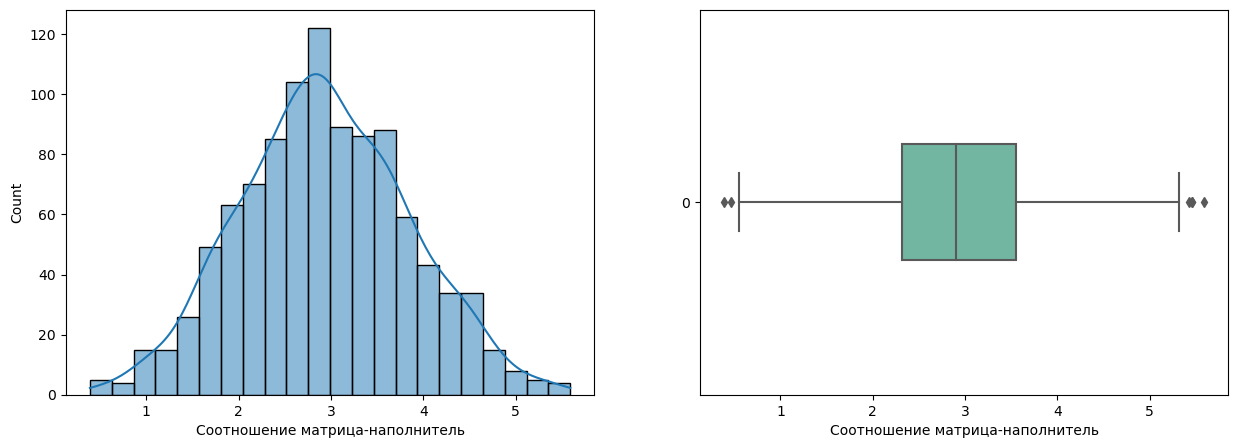

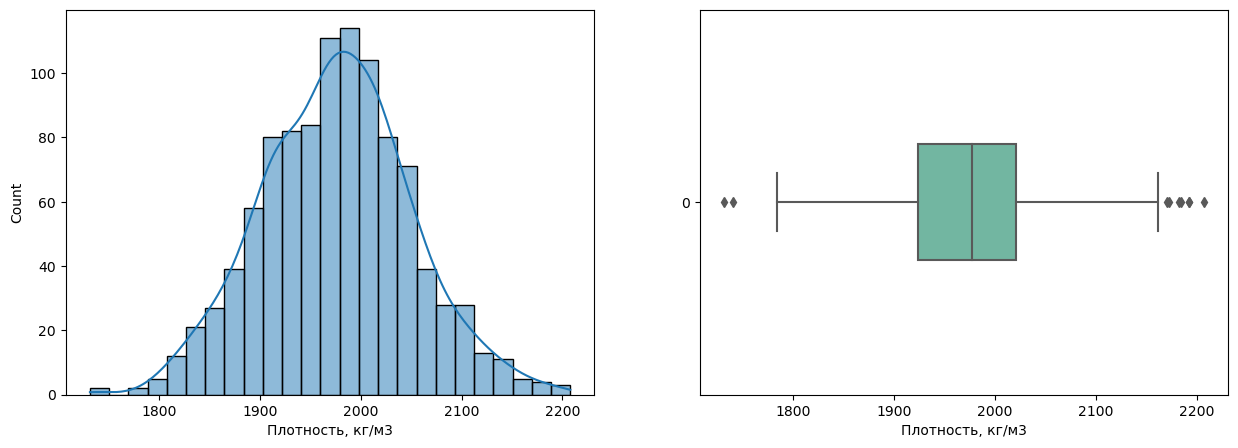

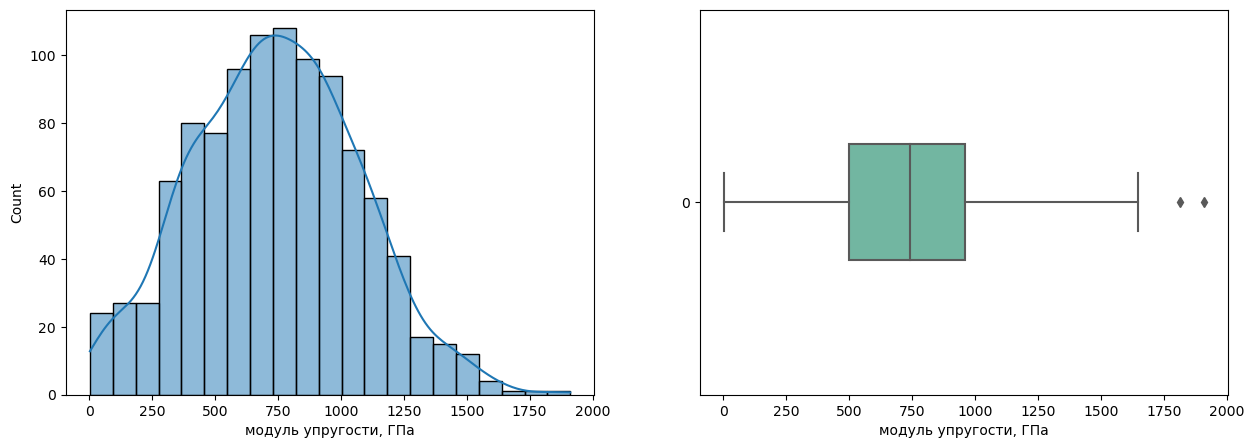

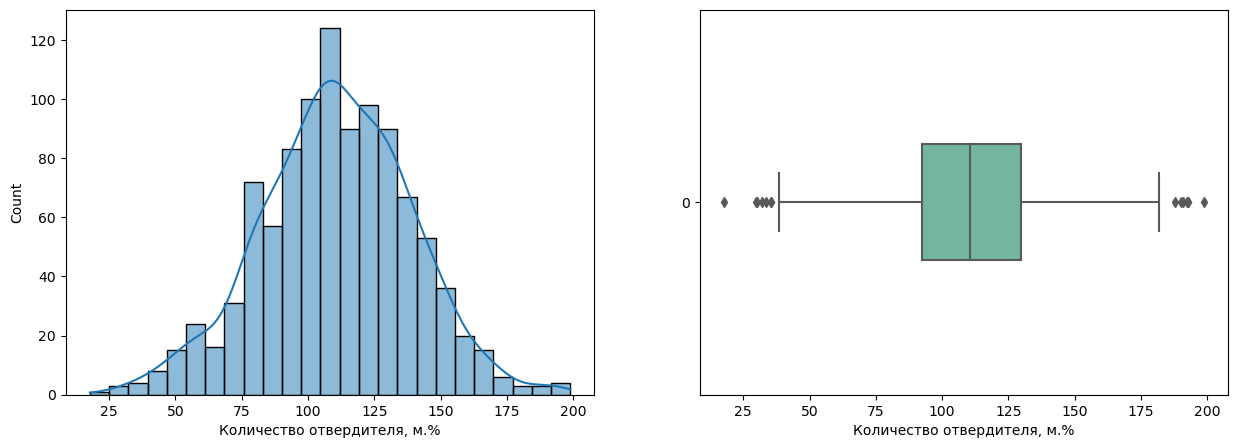

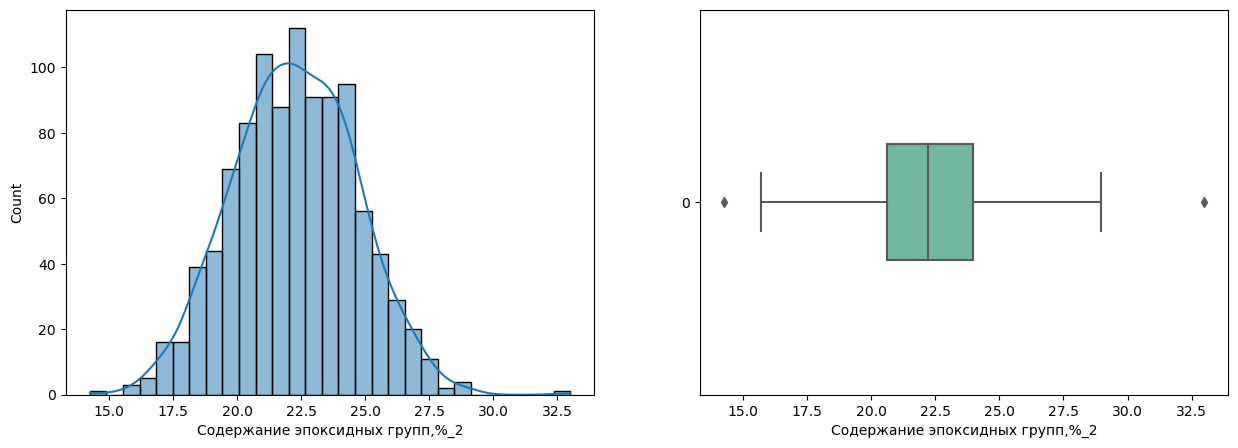

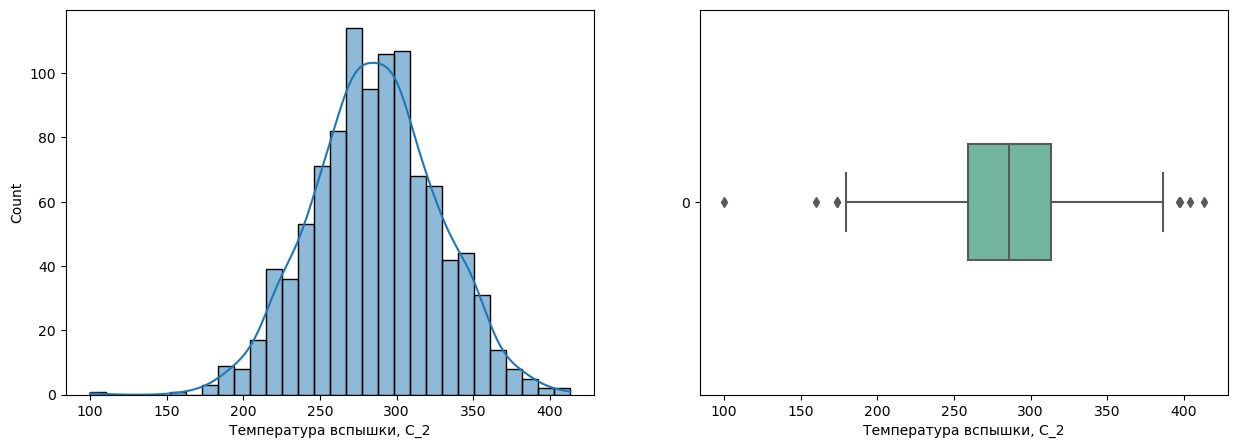

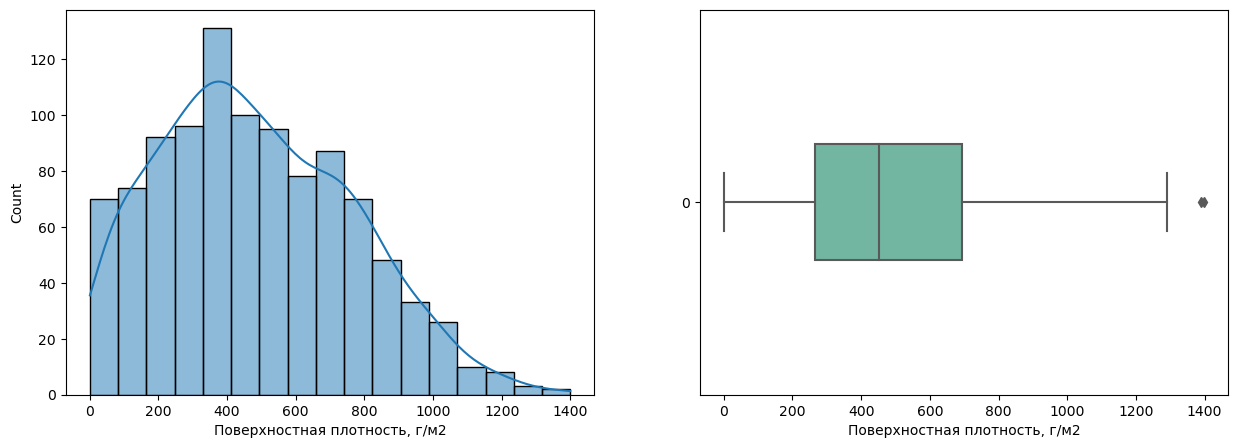

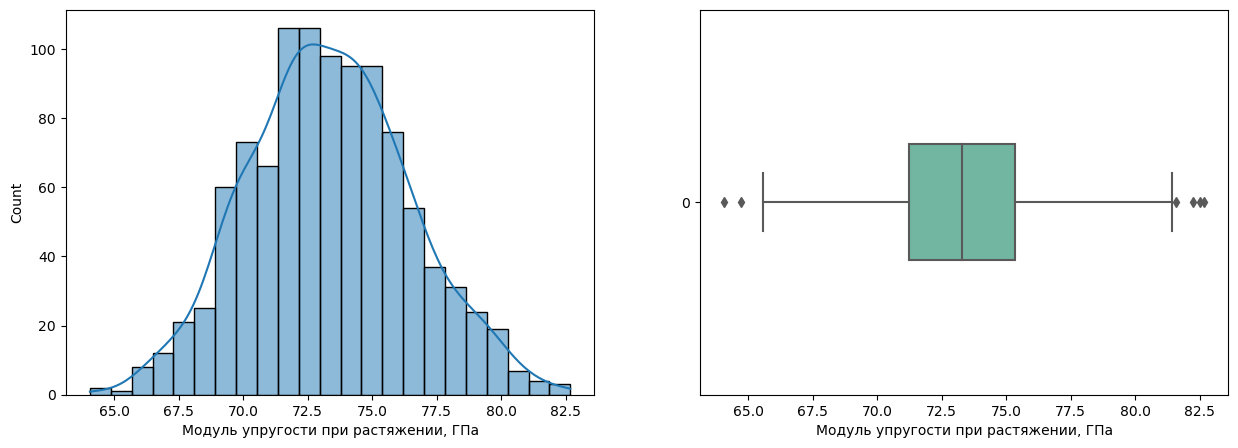

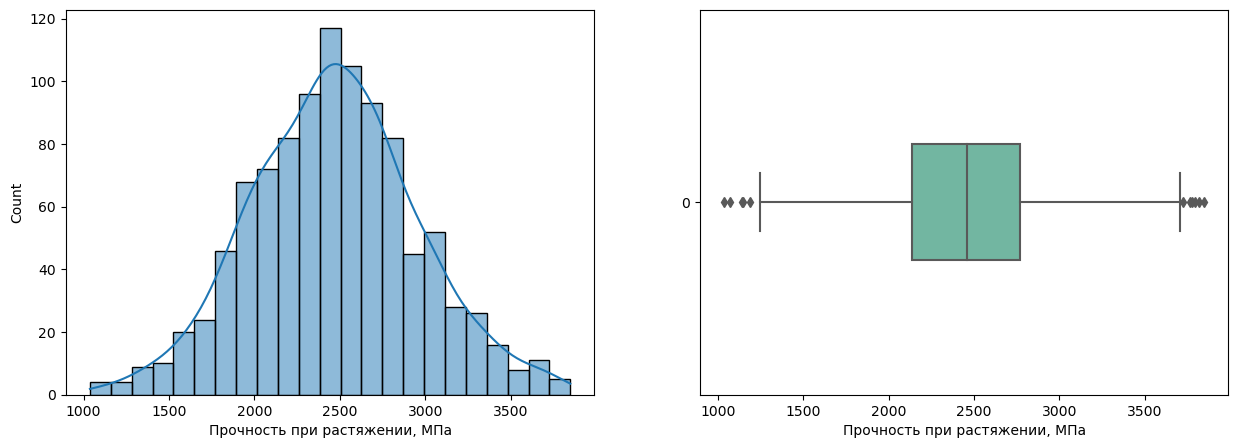

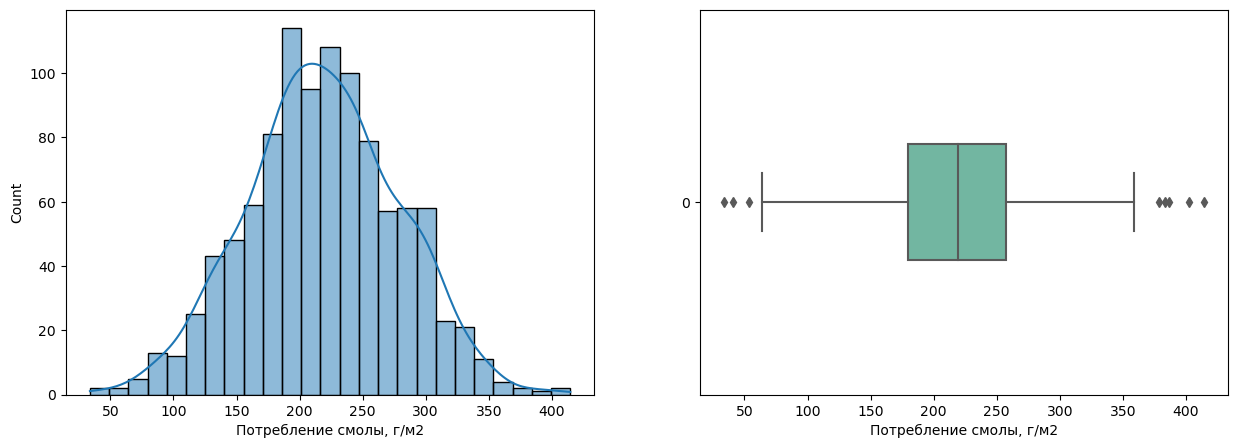

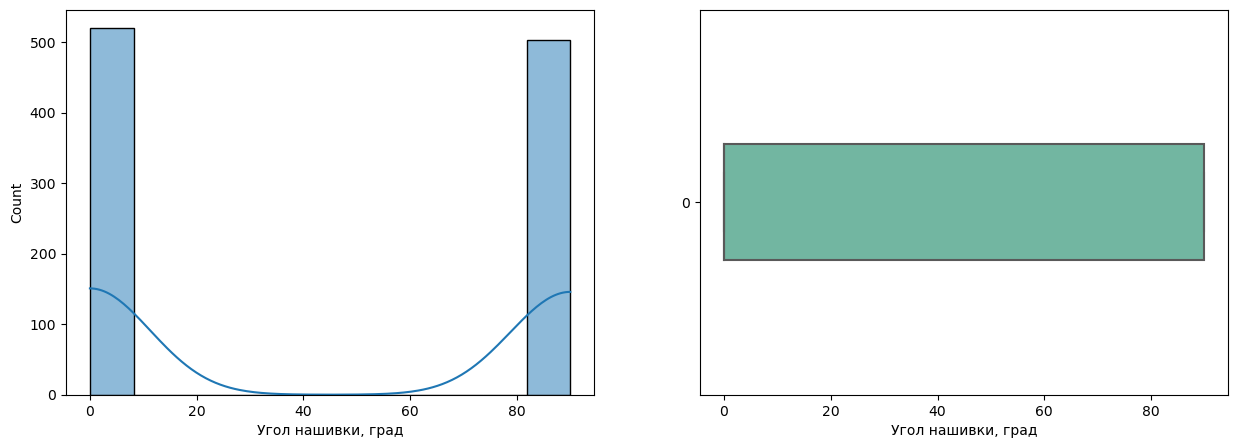

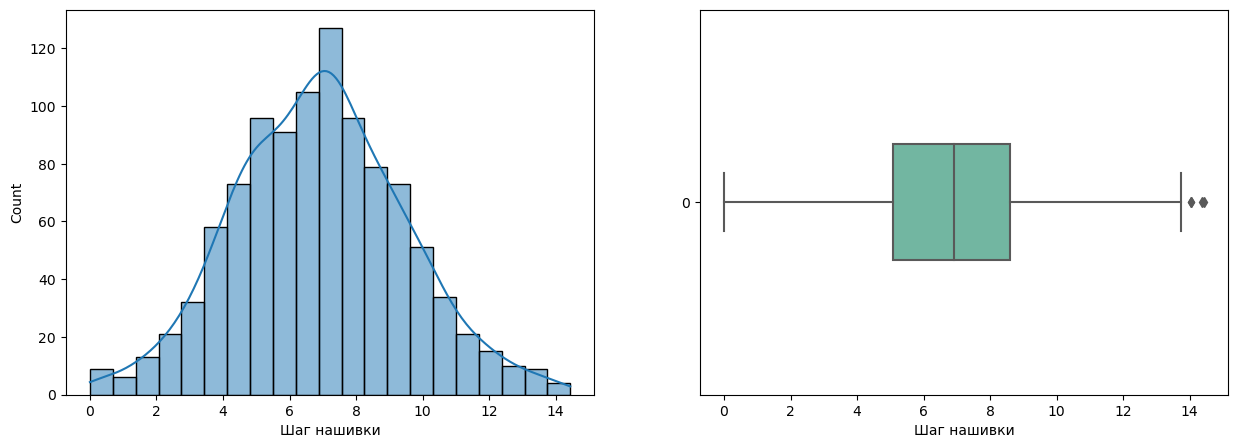

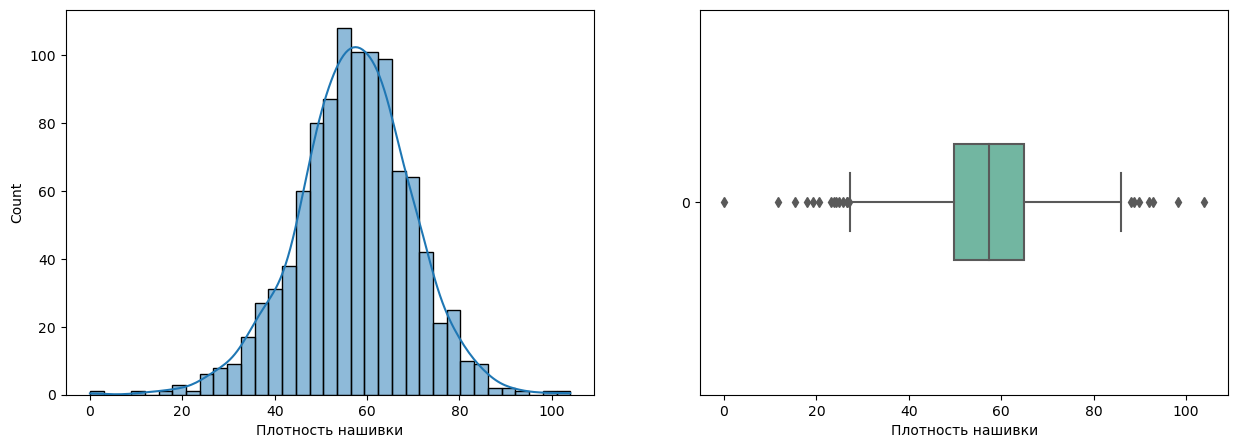

In [12]:
# гистограммы распределения и диаграммы ящика с усами для каждого показателя на исходном датасете
data_hist_boxplot_func(df)

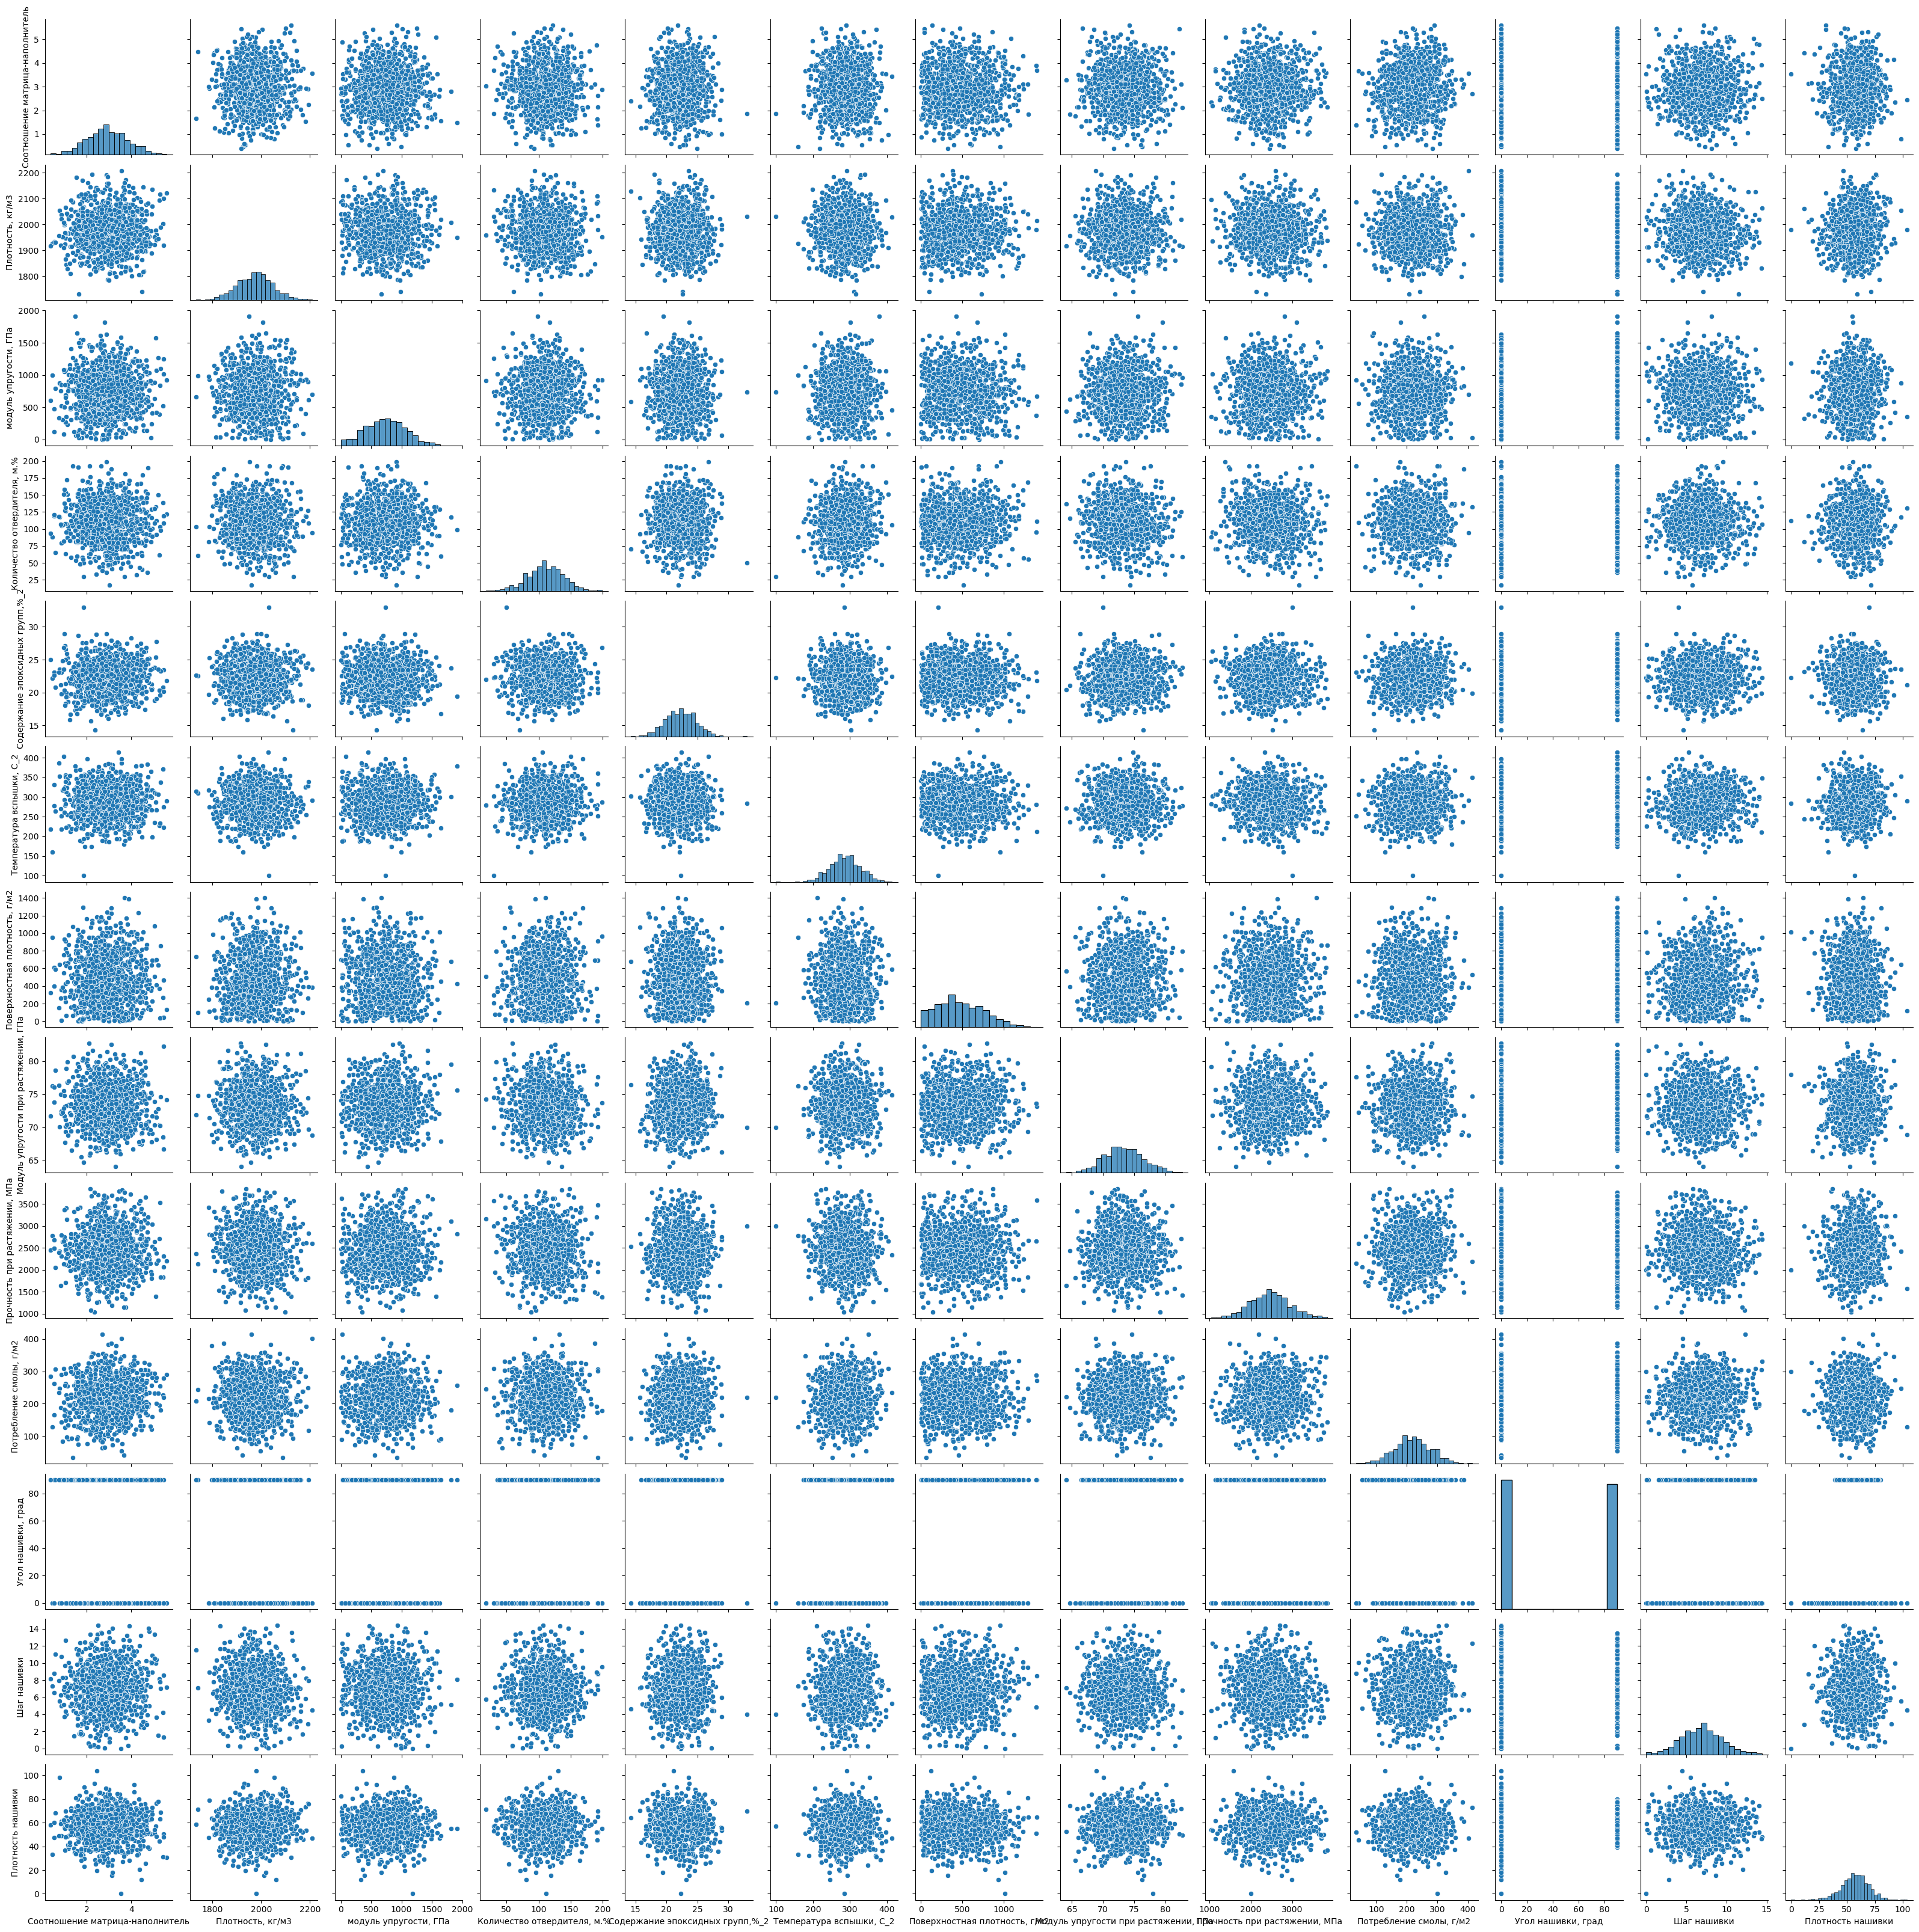

In [13]:
sns.pairplot(df, diag_kind= 'auto', palette='Set4')

<AxesSubplot:>

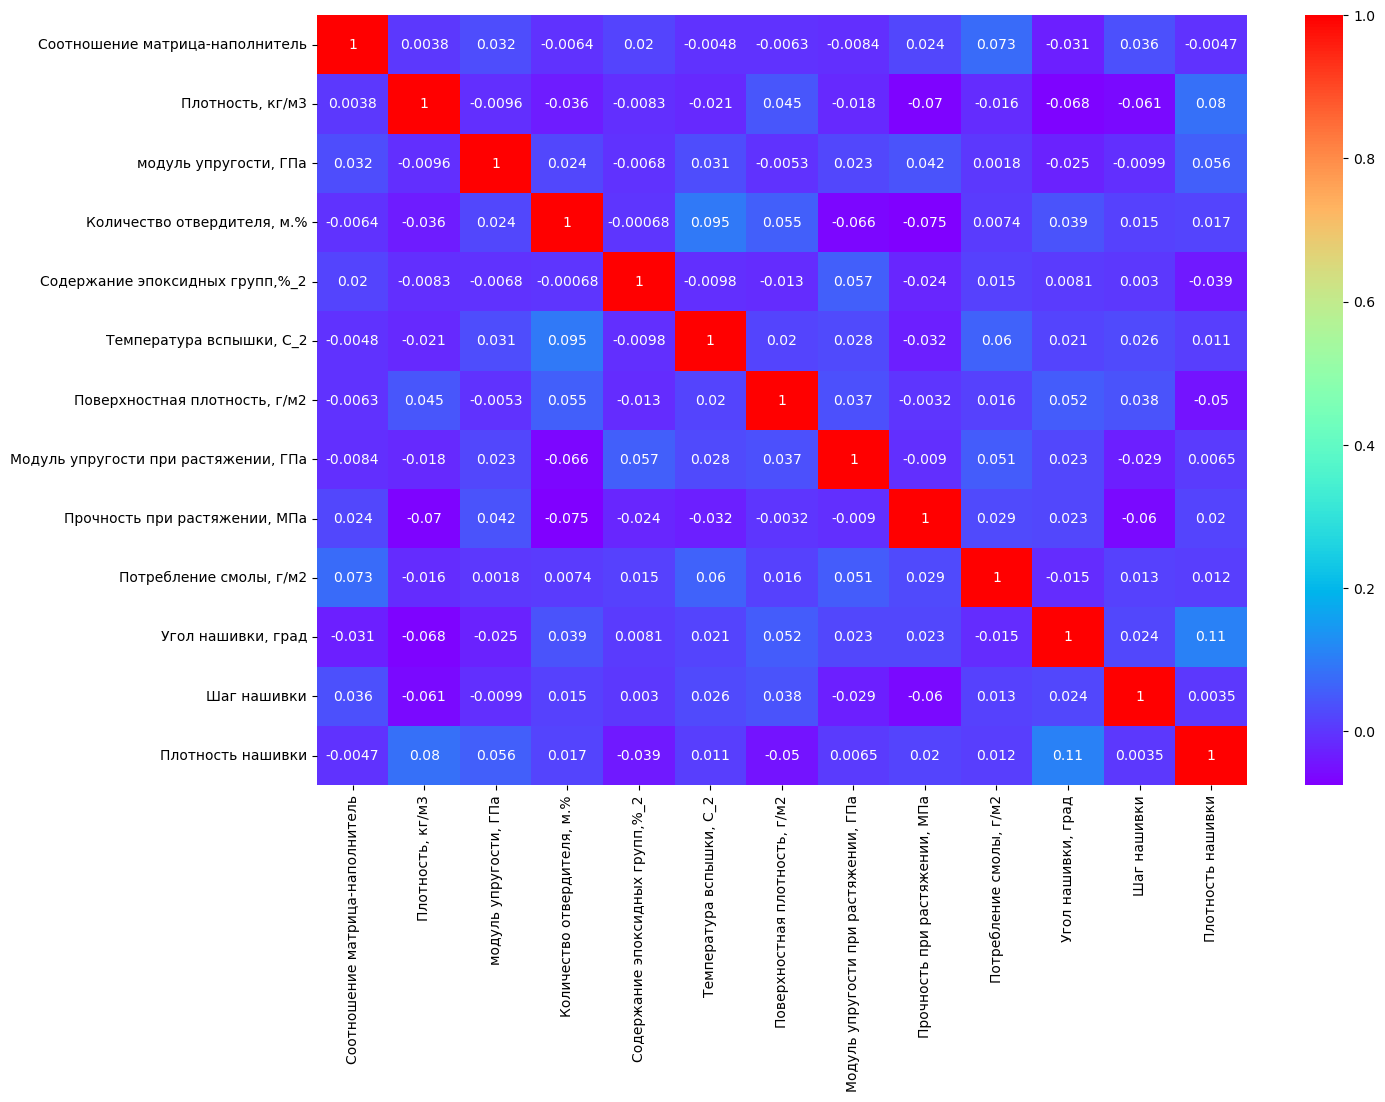

In [14]:

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'rainbow', annot = True)

In [15]:
# Анализ и исключение выбросов методом 3-х сигм (Выбросы заменяются на NaN, строки с выбросами удаляются из датасета)
for column in df.columns:
  q75, q25 = np.percentile(a=df[column], q=[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
  df.loc[df[column] < min, column] = np.nan
  df.loc[df[column] > max, column] = np.nan
  
clear_df = df.dropna(axis = 0)

# Определение размера датасета после удаления выбросов и проверка наличия пропусков
print("Размер датасета после удаления выбросов и проверка наличия пропусков: \n",
      "\nКоличество строк в очищенном датасете: ", clear_df.shape[0], 
      "\nКоличество столбцов (переменных) в очищенном датасете: ", clear_df.shape[1],
      "\nКоличество пропусков в данных очищенного датасета: ", clear_df.isna().sum().sum())

Размер датасета после удаления выбросов и проверка наличия пропусков: 
 
Количество строк в очищенном датасете:  936 
Количество столбцов (переменных) в очищенном датасете:  13 
Количество пропусков в данных очищенного датасета:  0


<AxesSubplot:ylabel='Density'>

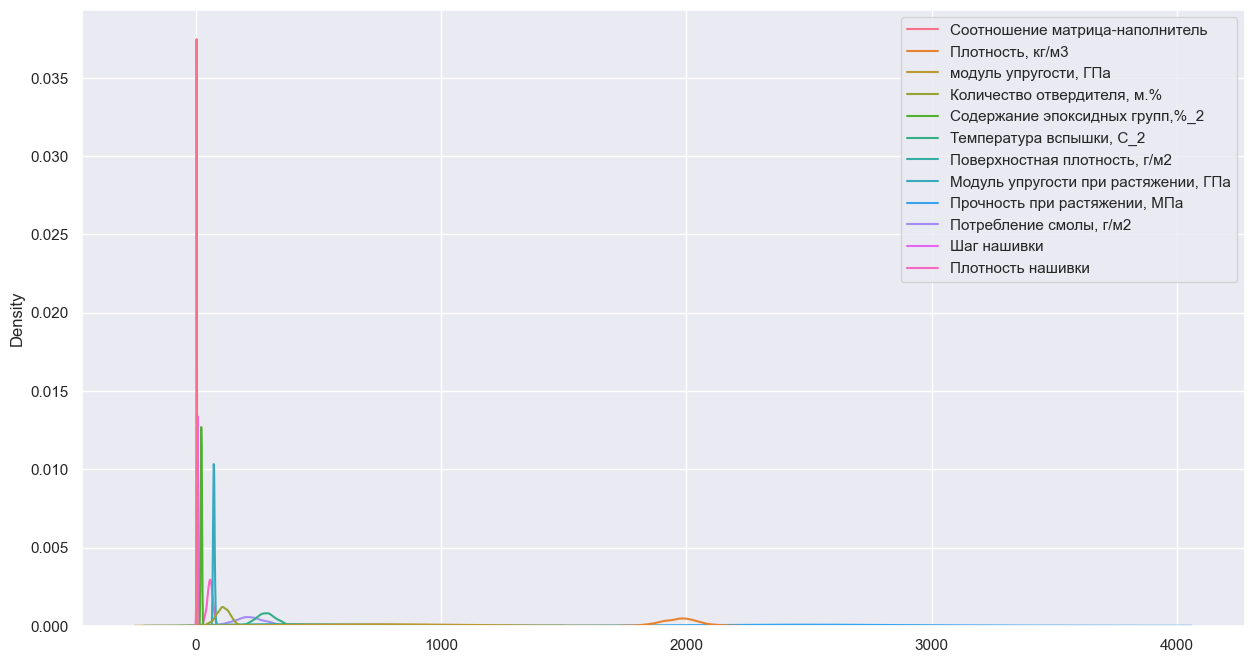

In [16]:

#Визуализация распределения на исходных очищеных данных (Угол нашивки не рассматривается)
sns.set(font_scale=1)
plt.figure(figsize = (15,8))
sns.kdeplot(data=clear_df.drop(labels='Угол нашивки, град', axis = 1))
     

In [17]:
# Нормализация данных проводится c помощью MinMaxScaler - от 0 до 1

scaler = MinMaxScaler(feature_range=(0,1)).fit_transform(clear_df)
norm_df = pd.DataFrame(scaler, columns = clear_df.columns) 
norm_df.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       936.0  0.498933  0.187489  0.0   
Плотность, кг/м3                      936.0  0.502695  0.187779  0.0   
модуль упругости, ГПа                 936.0  0.446764  0.199583  0.0   
Количество отвердителя, м.%           936.0  0.504664  0.188865  0.0   
Содержание эпоксидных групп,%_2       936.0  0.491216  0.180620  0.0   
Температура вспышки, С_2              936.0  0.516059  0.190624  0.0   
Поверхностная плотность, г/м2         936.0  0.373733  0.217078  0.0   
Модуль упругости при растяжении, ГПа  936.0  0.488647  0.191466  0.0   
Прочность при растяжении, МПа         936.0  0.495706  0.188915  0.0   
Потребление смолы, г/м2               936.0  0.521141  0.195781  0.0   
Угол нашивки, град                    936.0  0.511752  0.500129  0.0   
Шаг нашивки                           936.0  0.502232  0.183258  0.0   
Плотность нашивки                     936.0  0.513776  0.191342  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.372274  0.494538  0.629204  1.0  
Плотность, кг/м3                      0.368517  0.511229  0.624999  1.0  
модуль упругости, ГПа                 0.301243  0.447061  0.580446  1.0  
Количество отвердителя, м.%           0.376190  0.506040  0.637978  1.0  
Содержание эпоксидных групп,%_2       0.367716  0.489382  0.623410  1.0  
Температура вспышки, С_2              0.386128  0.515980  0.646450  1.0  
Поверхностная плотность, г/м2         0.205619  0.354161  0.538683  1.0  
Модуль упругости при растяжении, ГПа  0.359024  0.485754  0.615077  1.0  
Прочность при растяжении, МПа         0.365149  0.491825  0.612874  1.0  
Потребление смолы, г/м2               0.392067  0.523766  0.652447  1.0  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.0  
Шаг нашивки                           0.372211  0.504258  0.624604  1.0  
Плотность нашивки                     0.390482  0.516029  0.638842  1.0

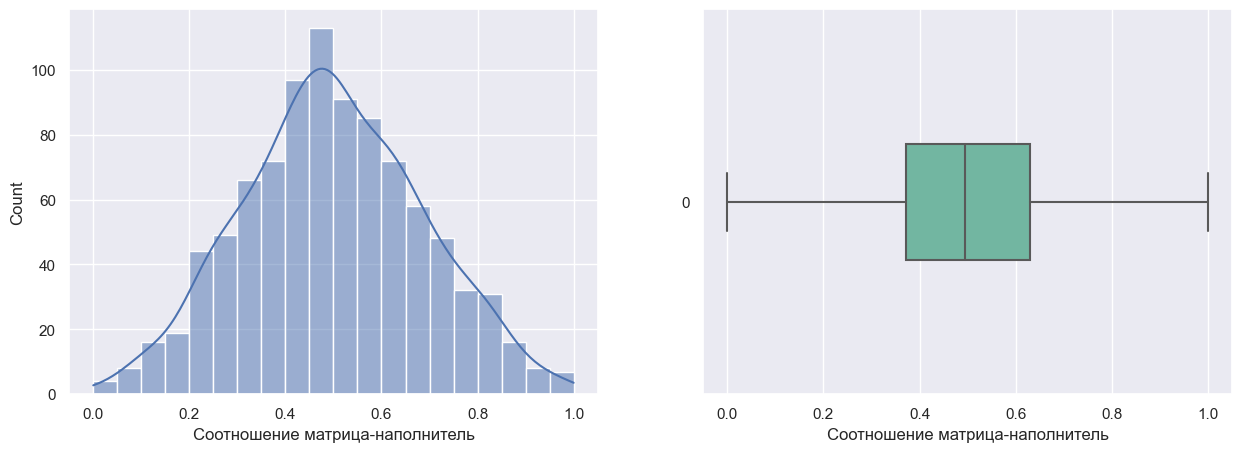

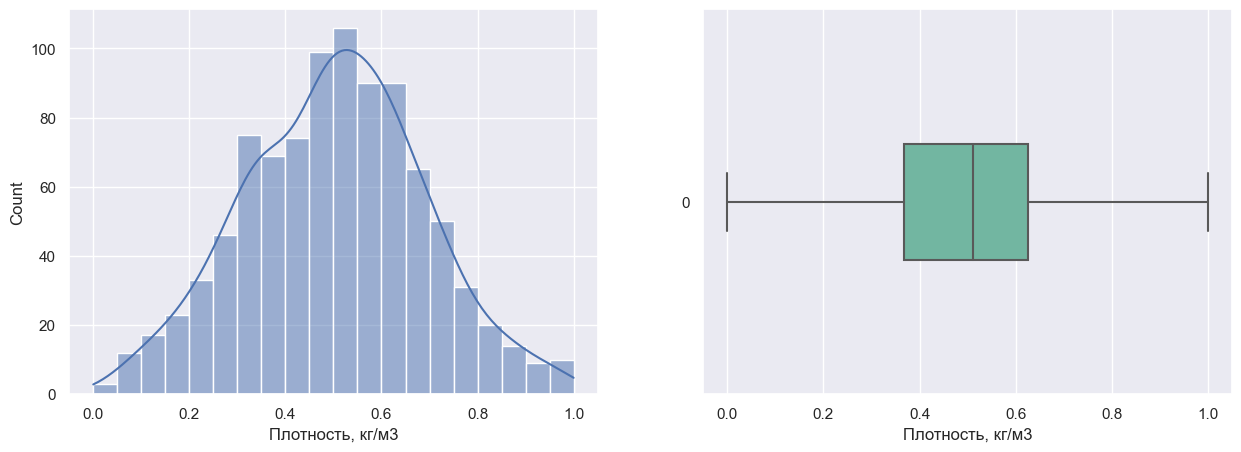

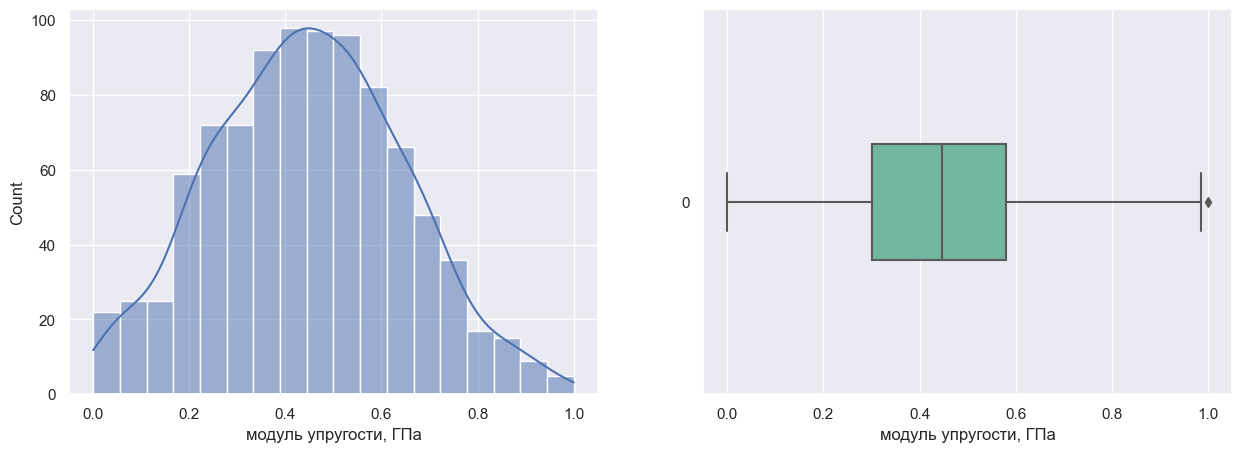

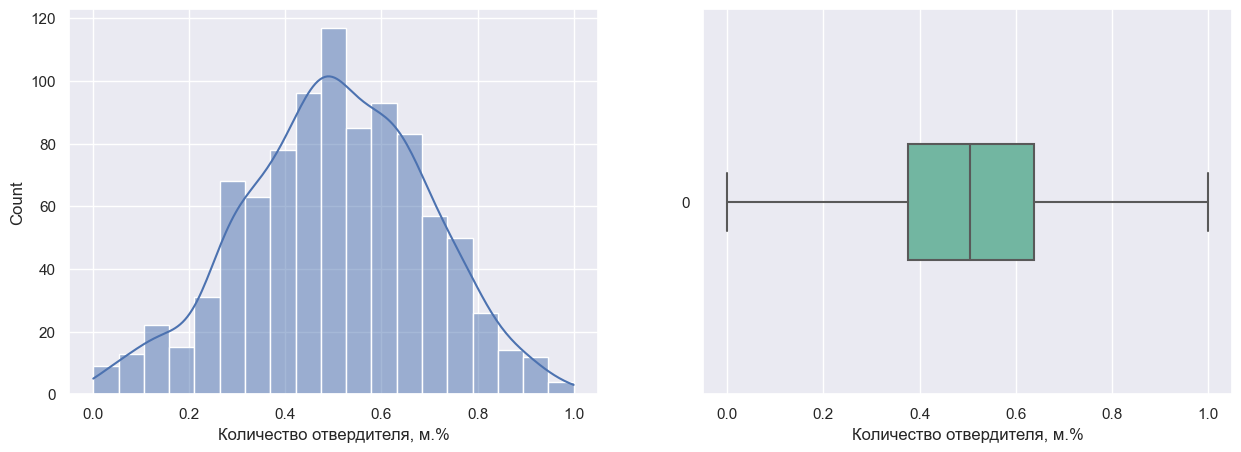

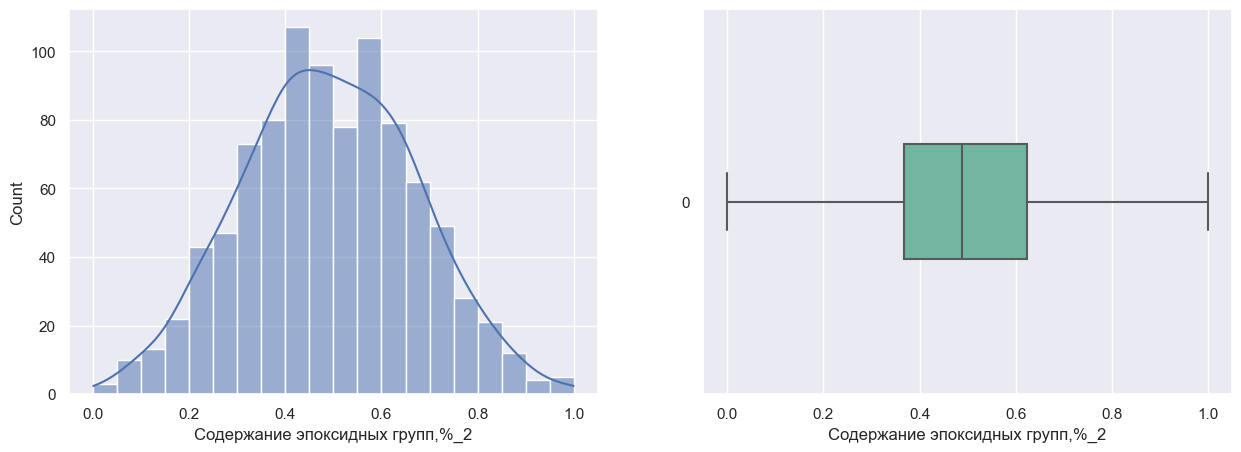

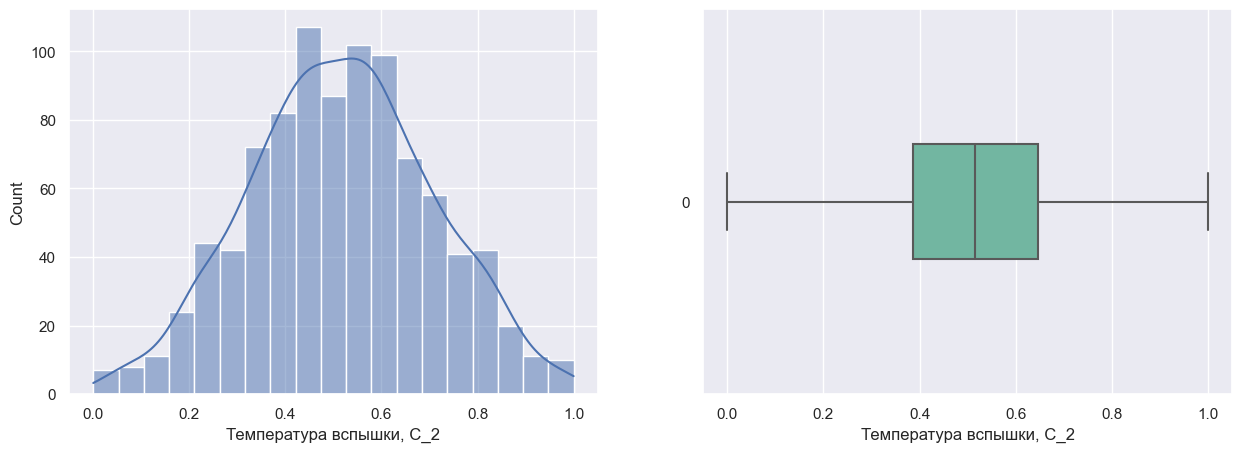

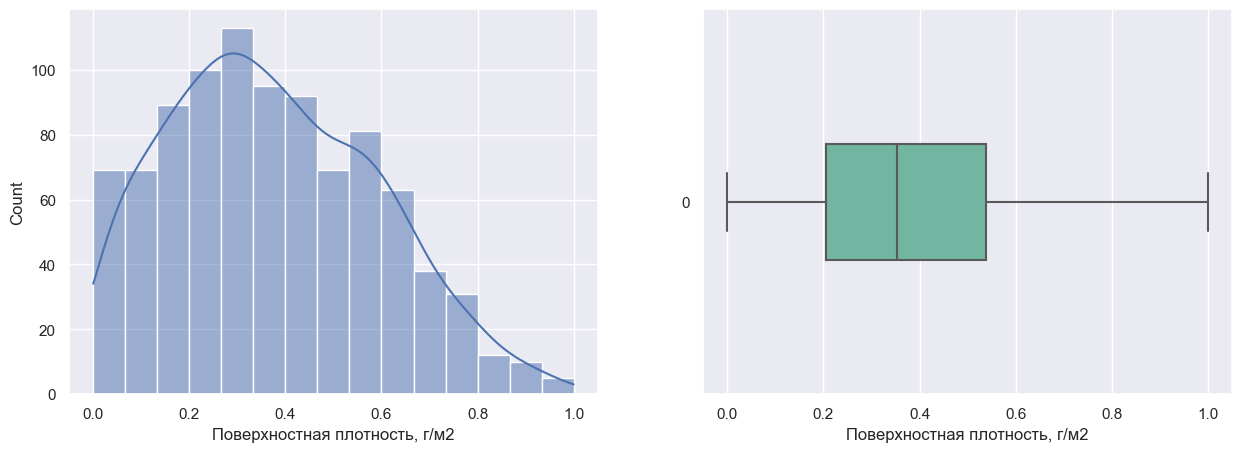

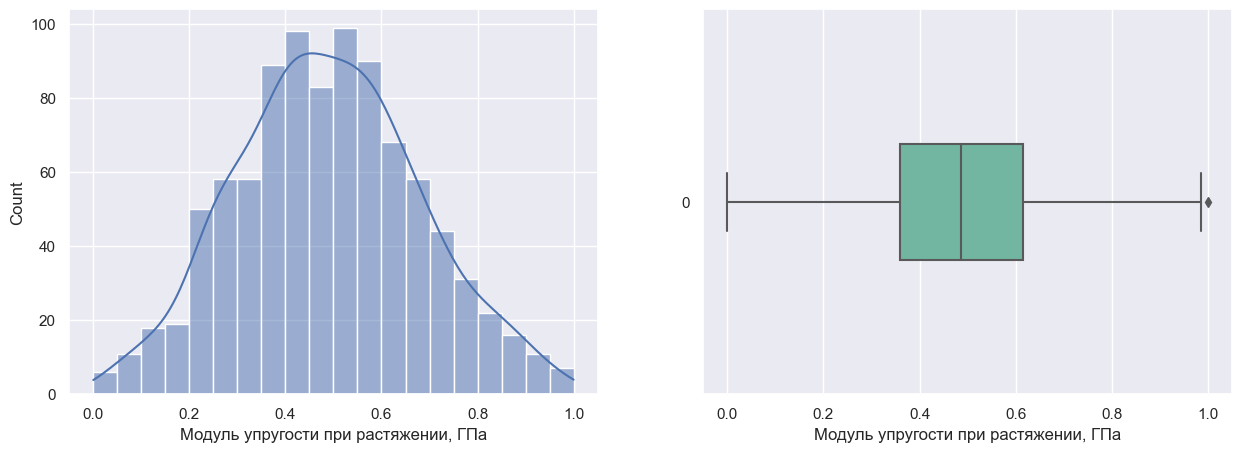

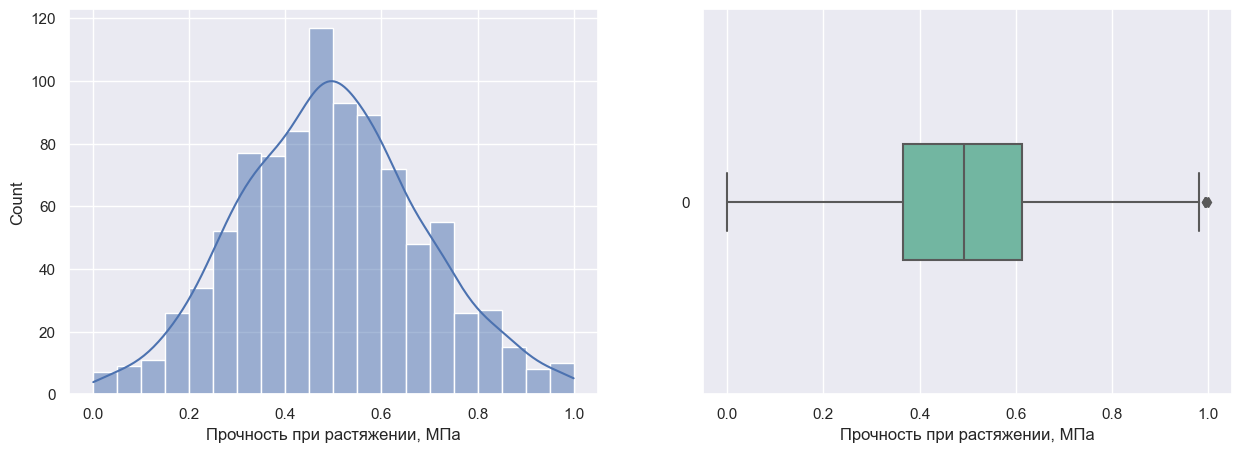

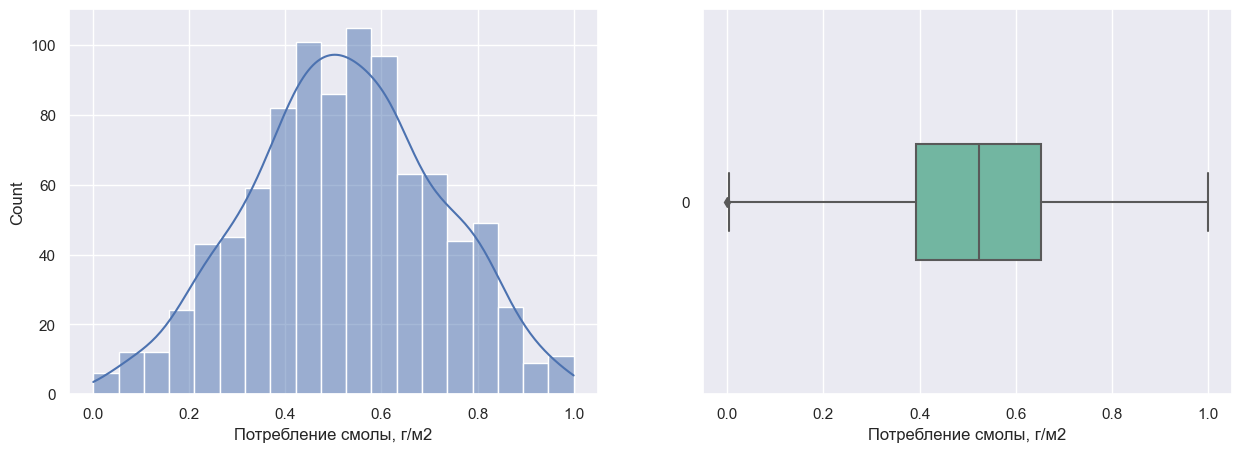

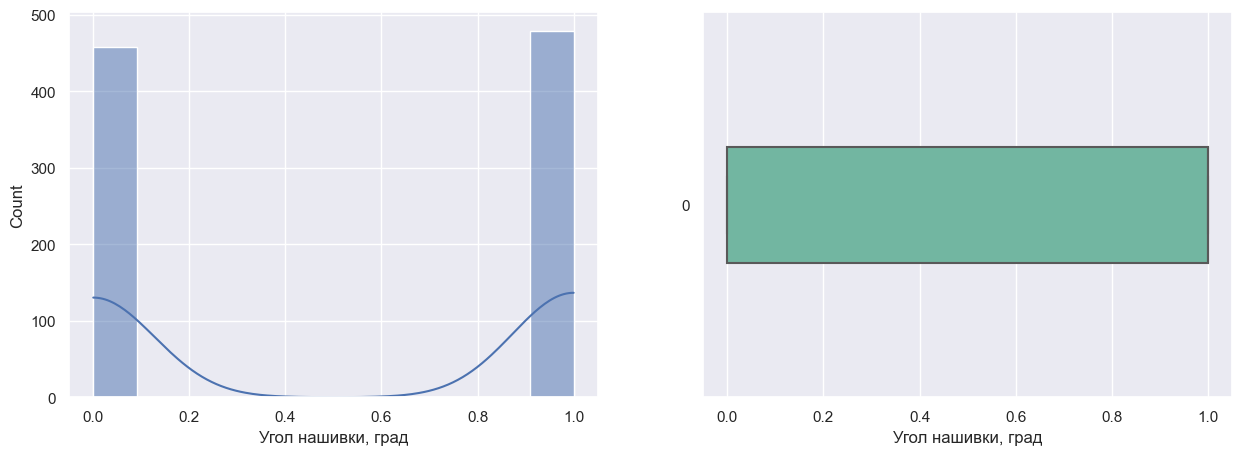

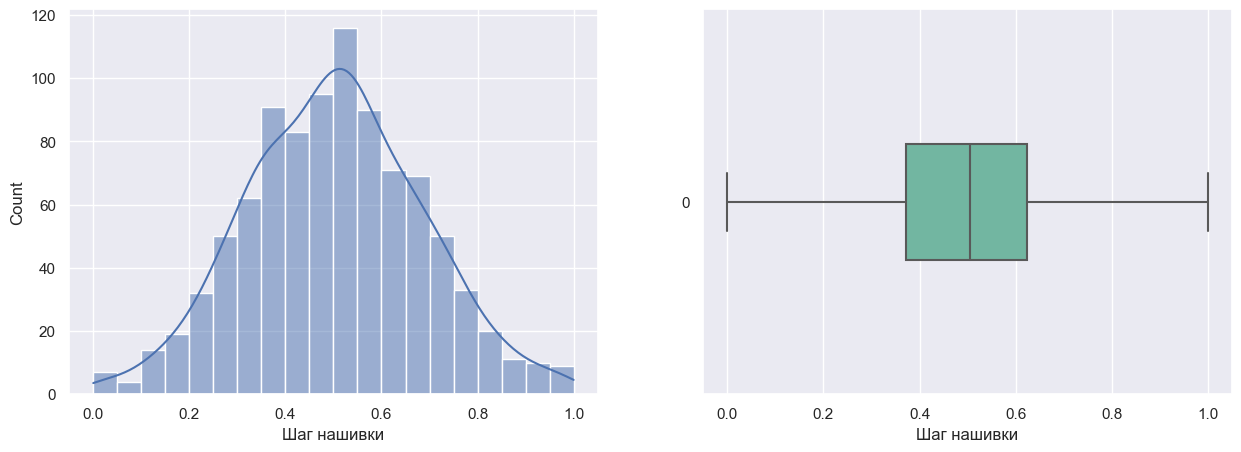

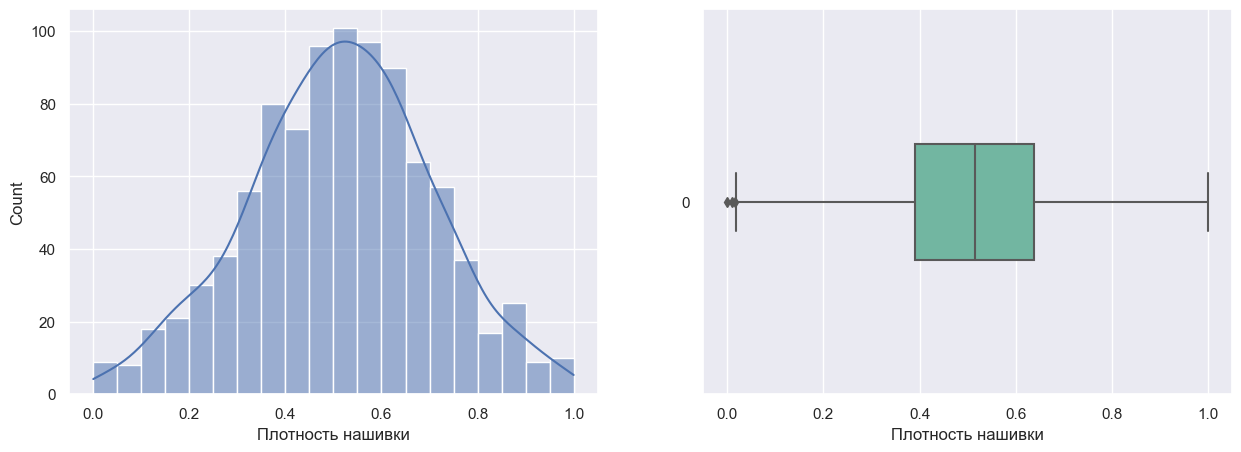

In [18]:

# проверка наличия выбросов на нормализованном датасете
data_hist_boxplot_func(norm_df)

<AxesSubplot:ylabel='Density'>

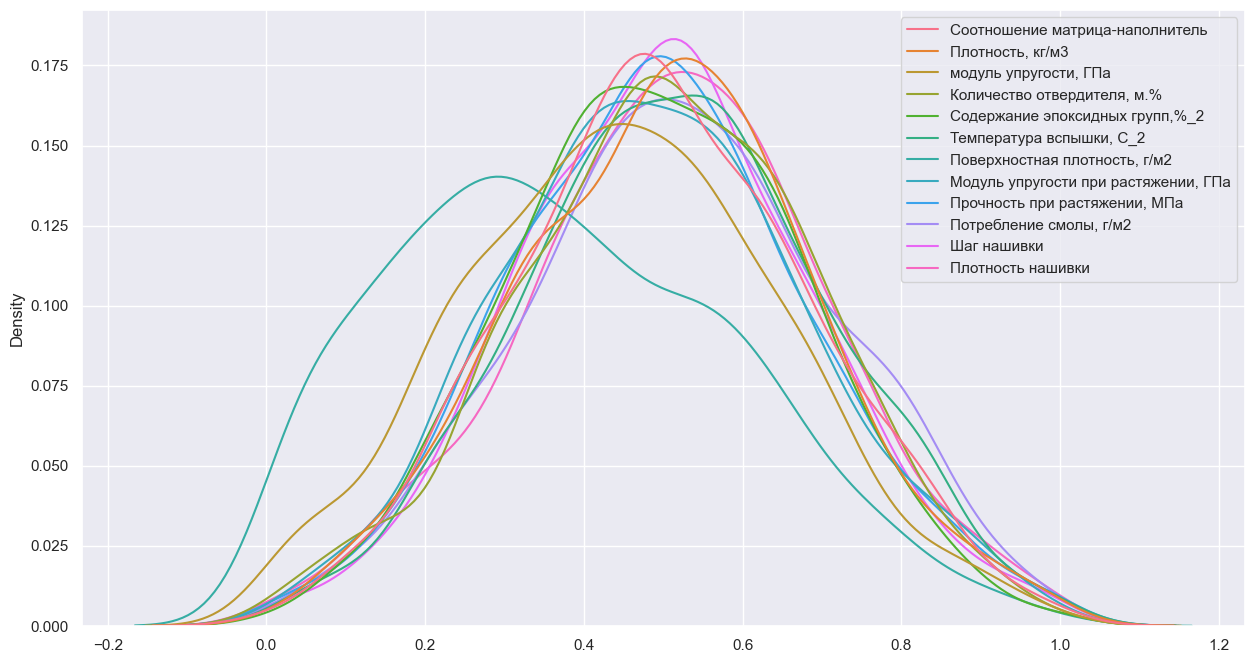

In [19]:

#Визуализация распределения на нормализованных данных (Угол нашивки не рассматривается)
sns.set(font_scale=1)
plt.figure(figsize = (15,8))
sns.kdeplot(data=norm_df.drop(labels='Угол нашивки, град', axis = 1))

In [20]:
#функция для модели регрессора и визуализации
def ml_model_func (regressor, param_grid_func, data, y_features):

  for y_feature in y_features:

    data_labels = data.drop(y_feature, axis=1).columns

    # Разбиение данных на обучающую и тестовую выборки
    y = np.array(data[y_feature])
    X = np.array(data.drop(y_feature, axis=1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 15)

    print('\nПостроение модели для параметра ', f"'{y_feature}'")

    #Проверка размерности выборок
    print('\nРазмерность выборок\n')
    print('X_train  :', X_train.shape)
    print('y_train  :', y_train.shape)
    print('X_test   :', X_test.shape)
    print('y_test   :', y_test.shape)

    #Создание модели и подбор параметров
    regr = regressor 
    
    print('\nПодбор параметров модели')
    regr_grid_search = GridSearchCV(estimator = regr, 
                              param_grid = param_grid, 
                              cv=10,
                              verbose=True, n_jobs=-1).fit(X_train, y_train)
    
    # Определение лучших параметров
    regr_best = regr_grid_search.best_estimator_  
    print(f"\nЛучшие параметры модели: '{regr_best}'")

    # Предсказание ответов на тестовых данных
    y_pred = regr_best.predict(X_test)   
    
    # Отрисовка результата
    print('\nРезультат обучения модели')
    plt.figure(figsize=(10,5))
    plt.scatter(range(0, len(y_test)), y_test, label = 'data', s =20)
    plt.plot(range(0, len(y_test)), y_pred, label = 'predict', color = 'green')
    plt.title(str(y_feature))
    plt.legend()
    plt.ylabel("Значение")
    plt.xlabel("Элементы выборки")
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=y_pred, label = 'y_pred')
    sns.kdeplot(data=y_test, label = 'y_test')
    plt.xlabel("Значение")
    plt.legend()  
    plt.show()

    print('Mean squared error: %.4f' % mean_squared_error(y_test, y_pred))
    print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))
    print('Coefficient of determination: ', r2_score(y_test, y_pred))

    #print(f"\n\nПрогнозирование зависимости параметра {y_feature} от остальных параметров")
    #for i in range(0, X_test.shape[1]):
      #print('\n')
      #plt.figure(figsize=(10,5))
      #plt.scatter(X_test[:,i], y_test, label = 'data', s =20)
      #plt.scatter(X_test[:,i], y_pred, label = 'predict', color = 'green', s =20)
      #plt.title(f"Прогнозирование зависимости параметра {y_feature} от {data_labels[i]}")
      #plt.ylabel(f"{y_feature}")
      #plt.xlabel(f"{data_labels[i]}")
      #plt.legend()
      #plt.show()      


Построение модели для параметра  'Прочность при растяжении, МПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Лучшие параметры модели: 'LinearRegression()'

Результат обучения модели


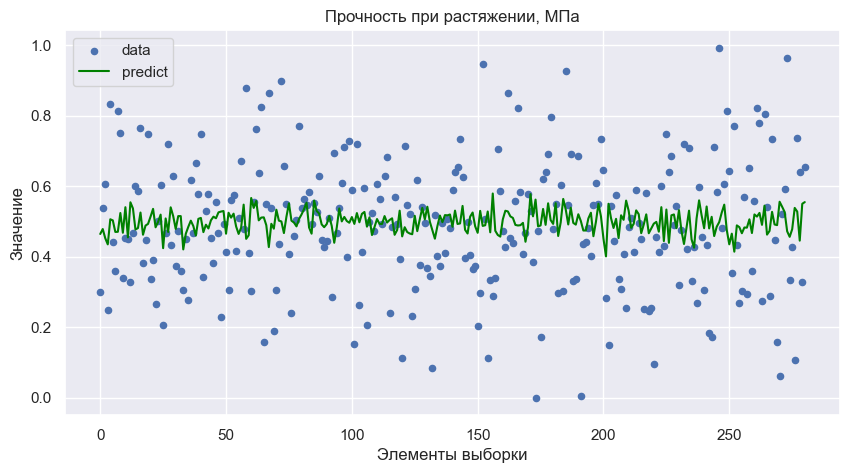

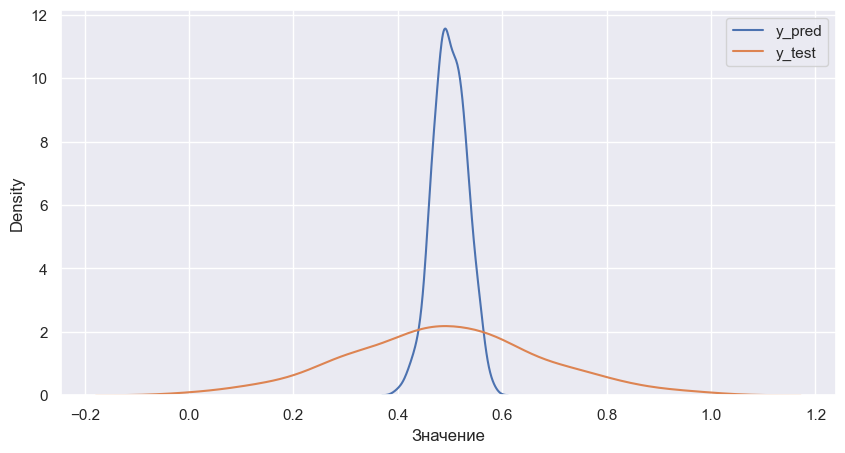

Mean squared error: 0.0344
Mean absolute error: 0.1446
Coefficient of determination:  -0.025858041763724415

Построение модели для параметра  'Модуль упругости при растяжении, ГПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Лучшие параметры модели: 'LinearRegression(positive=True)'

Результат обучения модели


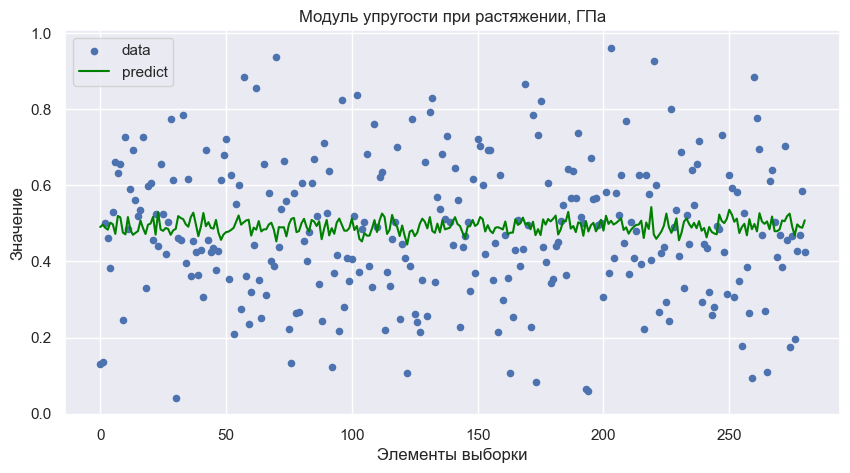

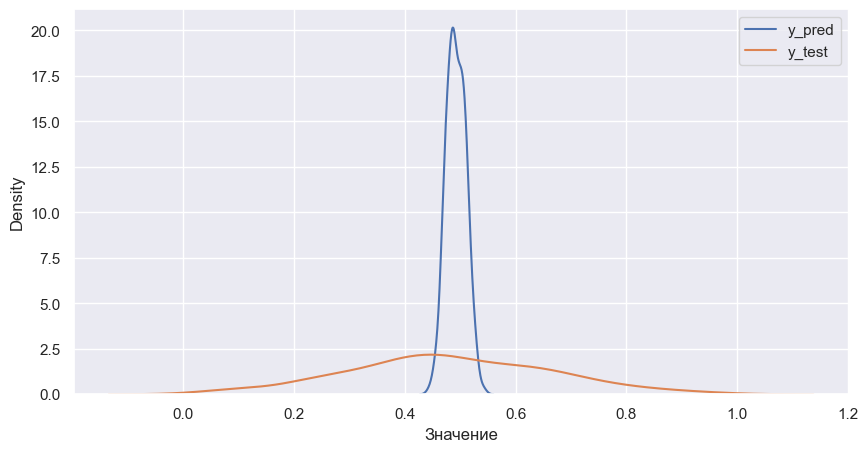

Mean squared error: 0.0328
Mean absolute error: 0.1456
Coefficient of determination:  0.0037936045133480922


In [21]:

param_grid = {'fit_intercept': [True, False],
                'positive': [False, True]}
                
ml_model_func(LinearRegression(), param_grid, 
              norm_df, ['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'])


Проверка размерности выборок для показателя  ' Прочность при растяжении, МПа '
X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

X_trainP  : (655,)
X_testP   : (281,) 


Подбор параметров модели
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Лучшие параметры модели:  LinearRegression(fit_intercept=False, positive=True)

Результат обучения модели


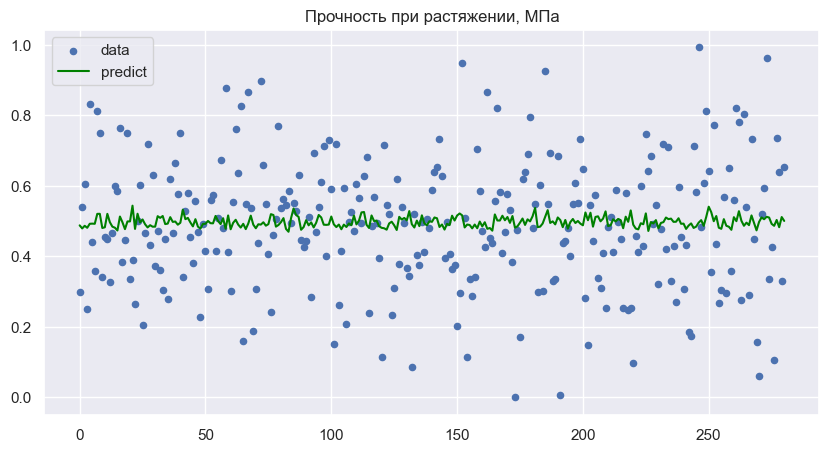

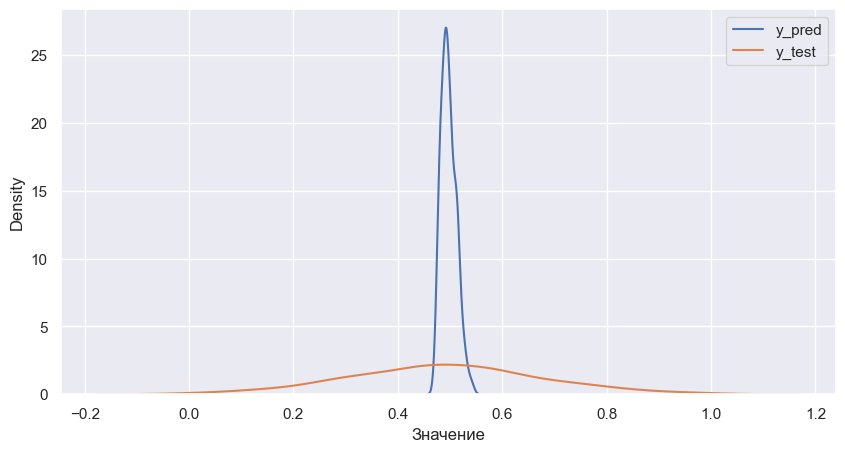

Mean squared error: 0.0333
Mean absolute error: 0.1441
Coefficient of determination:  0.0062684142884994465

Проверка размерности выборок для показателя  ' Модуль упругости при растяжении, ГПа '
X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

X_trainP  : (655,)
X_testP   : (281,) 


Подбор параметров модели
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Лучшие параметры модели:  LinearRegression(positive=True)

Результат обучения модели


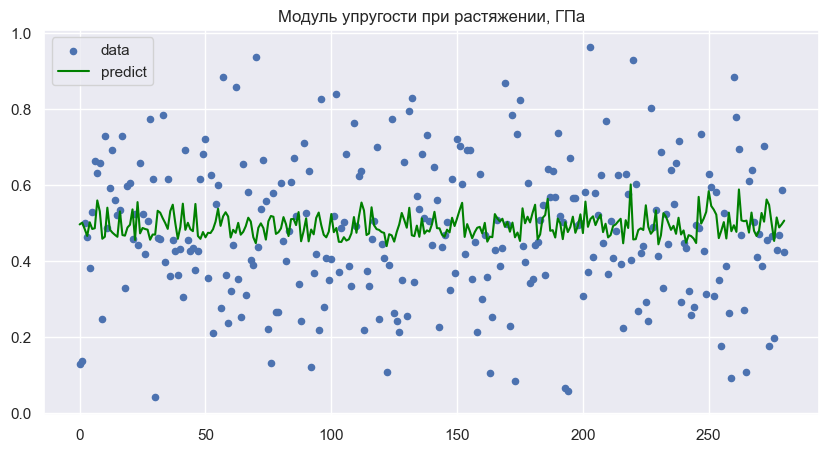

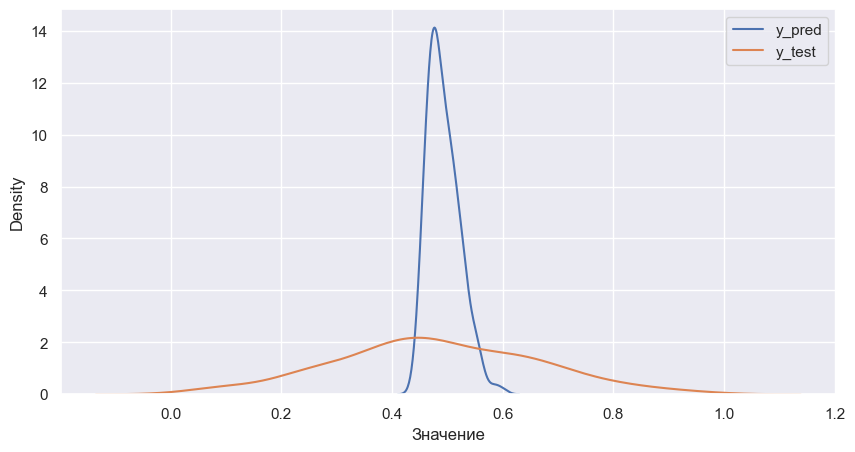

Mean squared error: 0.0332
Mean absolute error: 0.1460
Coefficient of determination:  -0.006984976626581485


In [22]:
y_features = ['Прочность при растяжении, МПа', 
              'Модуль упругости при растяжении, ГПа']

for y_feature in y_features:

  data_labels = norm_df.drop(y_feature, axis=1).columns

  y = np.array(norm_df[y_feature])
  X = np.array(norm_df.drop(y_feature, axis=1))

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 15)

  #Применение полиномиальных параметров 
  X_trainP = PolynomialFeatures(degree=3).fit_transform(X_train)
  X_testP = PolynomialFeatures(degree=3).fit_transform(X_test)

  
  print('\nПроверка размерности выборок для показателя ', "'",str(y_feature),"'")
  print('X_train  :', X_train.shape)
  print('y_train  :', y_train.shape)
  print('X_test   :', X_test.shape)
  print('y_test   :', y_test.shape)
  print('\nX_trainP  :', y_train.shape)
  print('X_testP   :', y_test.shape, '\n')

  
  regr = LinearRegression() #Создание модели и определение предлагаемых параметров
  param_grid = {'fit_intercept': [True, False],
                'positive': [False, True]}

  print('\nПодбор параметров модели')
  regr_grid_search = GridSearchCV(estimator = regr, #подбор параметров на обучающей выборке
                            param_grid = param_grid, 
                            cv=10,
                            verbose=True, n_jobs=-1).fit(X_trainP, y_train)

  regr_best = regr_grid_search.best_estimator_  # Определяем лучшие параметры
  print('Лучшие параметры модели: ', regr_best)

  y_pred = regr_best.predict(X_testP)   # Предсказание ответов на тестовых данных
  
  # Отрисовка результата
  print('\nРезультат обучения модели')
  plt.figure(figsize=(10,5))
  plt.scatter(range(0, len(y_test)), y_test, label = 'data', s =20)
  plt.plot(range(0, len(y_test)), y_pred, label = 'predict', color = 'green')
  plt.title(str(y_feature))
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,5))
  sns.kdeplot(data=y_pred, label = 'y_pred')
  sns.kdeplot(data=y_test, label = 'y_test')
  plt.xlabel("Значение")
  plt.legend()  
  plt.show()

  print('Mean squared error: %.4f' % mean_squared_error(y_test, y_pred))
  print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))
  print('Coefficient of determination: ', r2_score(y_test, y_pred))
  
  #print(f"\n\nПрогнозирование зависимости параметра {y_feature} от остальных параметров")
  #for i in range(0, X_test.shape[1]):
    #print('\n')
    #plt.figure(figsize=(10,5))
    #plt.scatter(X_test[:,i], y_test, label = 'data', s =20)
    #plt.scatter(X_test[:,i], y_pred, label = 'predict', color = 'green')
    #plt.ylabel(f"{y_feature}")
    #plt.xlabel(f"{data_labels[i]}")
    #plt.legend()
    #plt.show()

In [23]:

X_test.shape[1]

12


Построение модели для параметра  'Прочность при растяжении, МПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 36 candidates, totalling 360 fits


C:\Users\olgaa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(



Лучшие параметры модели: 'RandomForestRegressor(criterion='mae', max_depth=5, max_features=4, n_jobs=-1,
                      warm_start=True)'

Результат обучения модели


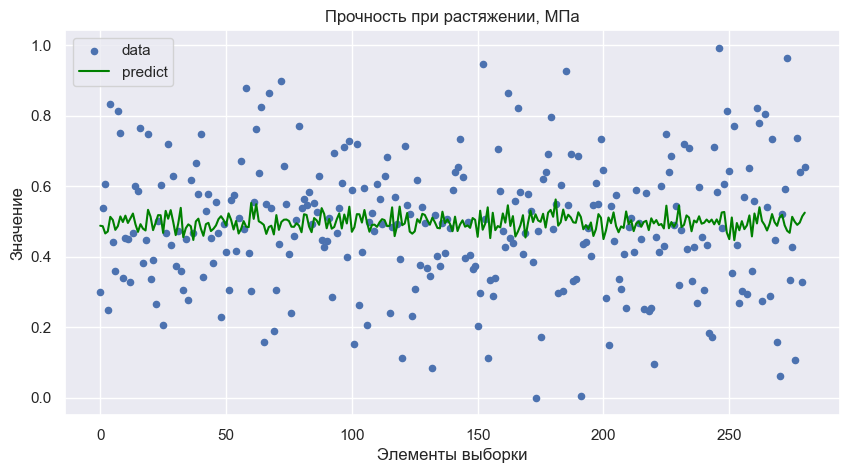

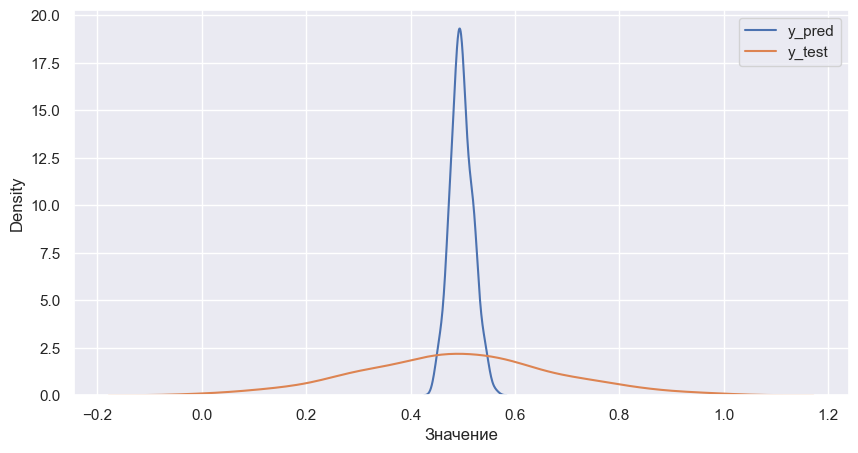

Mean squared error: 0.0338
Mean absolute error: 0.1448
Coefficient of determination:  -0.006661261121547746

Построение модели для параметра  'Модуль упругости при растяжении, ГПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 36 candidates, totalling 360 fits


C:\Users\olgaa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(



Лучшие параметры модели: 'RandomForestRegressor(criterion='mse', max_depth=5, max_features=4,
                      n_estimators=50, n_jobs=-1, warm_start=True)'

Результат обучения модели


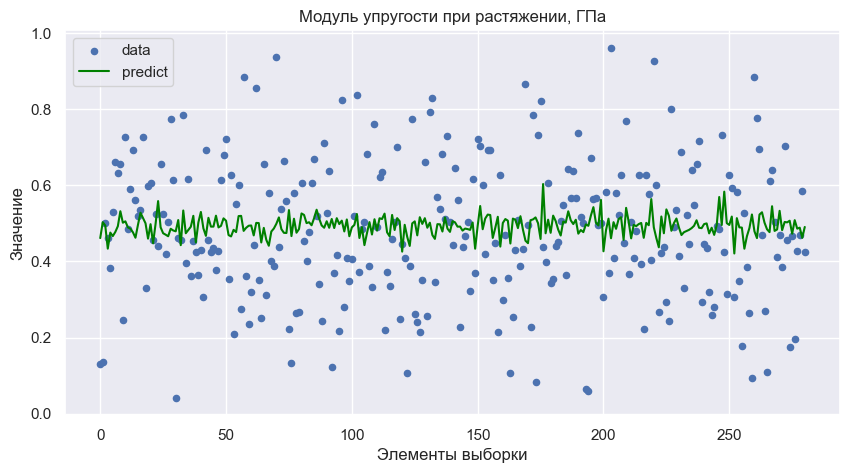

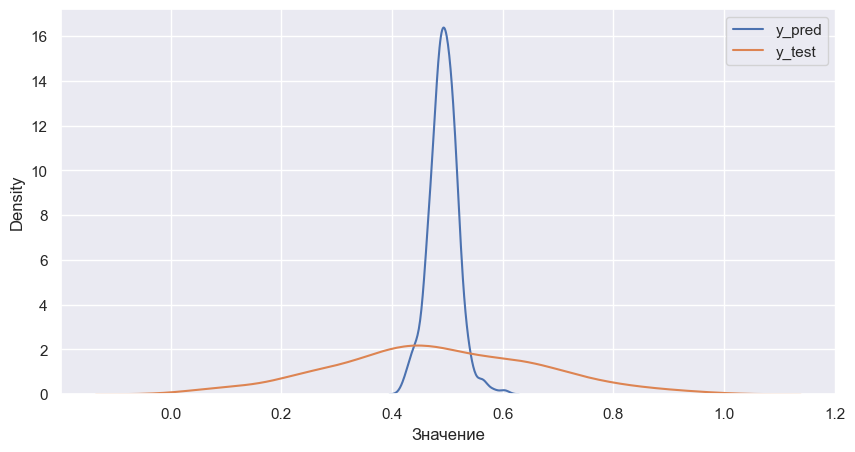

Mean squared error: 0.0332
Mean absolute error: 0.1467
Coefficient of determination:  -0.007041697034829264


In [24]:
param_grid = {'n_estimators': [10, 50, 100], 
              'criterion':   ["mse", "mae"], 
              'max_depth':   [5, 15],
              'max_features': [3, 4, 12],
              'warm_start': [True],
              'n_jobs': [-1], 
              }
                
ml_model_func(RandomForestRegressor(), param_grid, norm_df, 
              ['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'])
     


Построение модели для параметра  'Прочность при растяжении, МПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 12 candidates, totalling 120 fits

Лучшие параметры модели: 'KNeighborsRegressor(n_jobs=-1, n_neighbors=150, p=1, weights='distance')'

Результат обучения модели


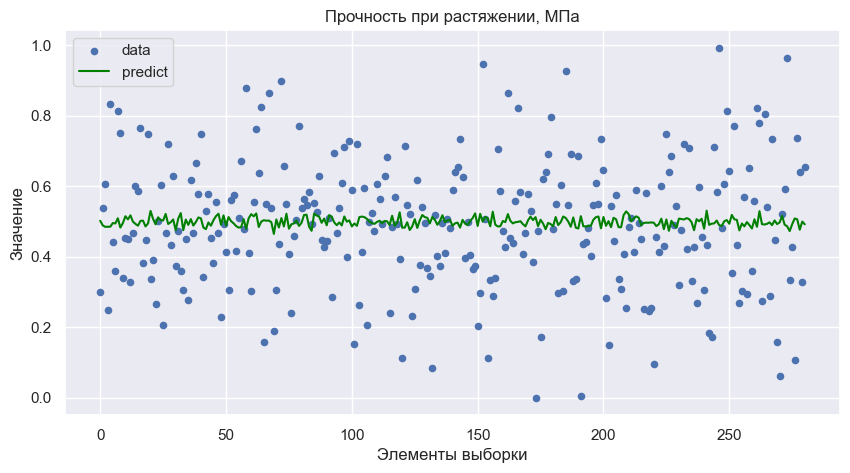

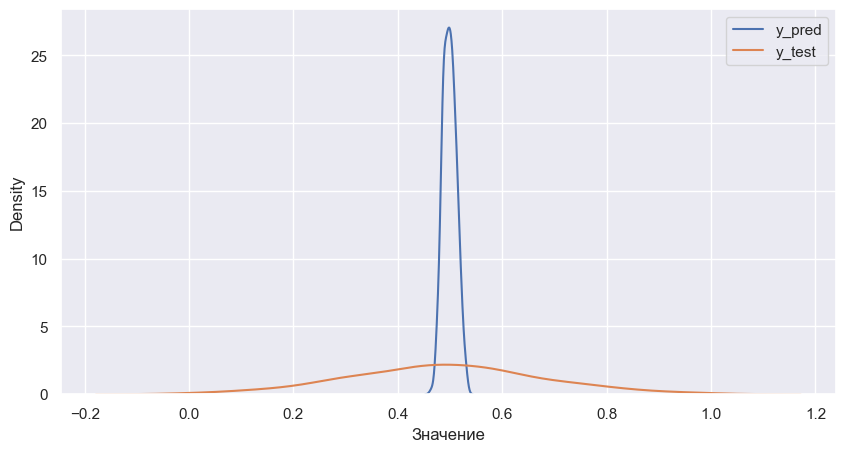

Mean squared error: 0.0340
Mean absolute error: 0.1456
Coefficient of determination:  -0.01369632127961018

Построение модели для параметра  'Модуль упругости при растяжении, ГПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 12 candidates, totalling 120 fits

Лучшие параметры модели: 'KNeighborsRegressor(n_jobs=-1, n_neighbors=150, p=1)'

Результат обучения модели


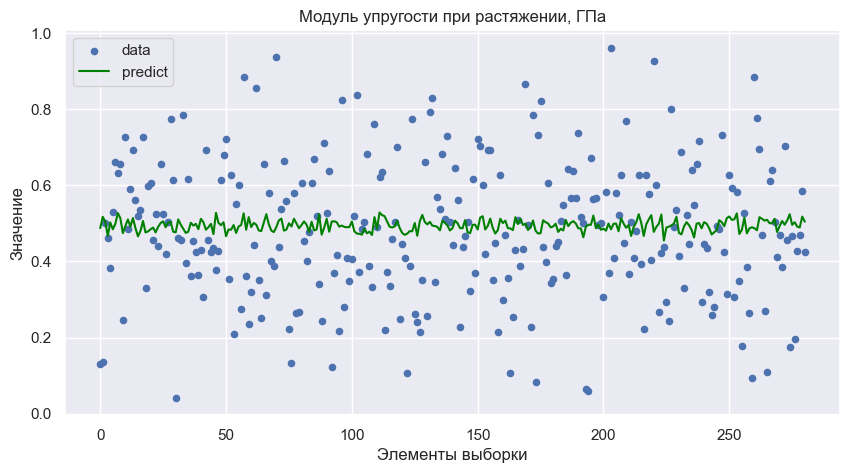

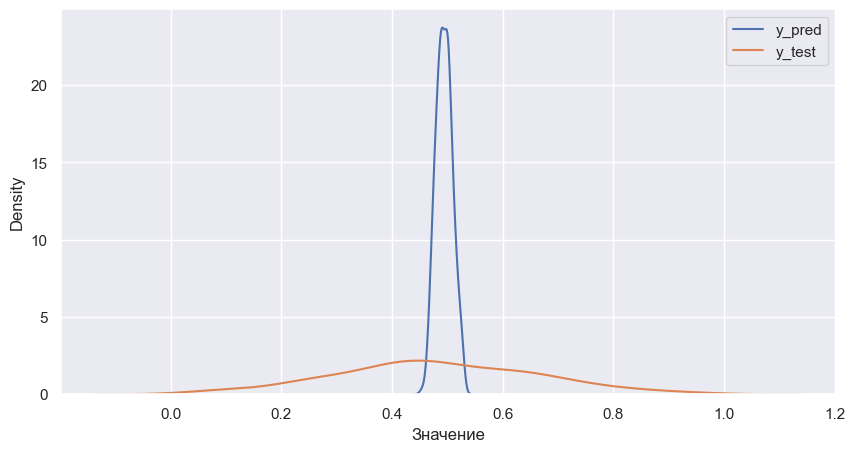

Mean squared error: 0.0330
Mean absolute error: 0.1458
Coefficient of determination:  0.00021269766052234296


In [26]:
param_grid = {'n_neighbors': [5, 50, 150],
              'weights':   ['uniform', 'distance'], 
              'p': [1,2],
              'metric': ["minkowski"],
              'n_jobs':[-1]
                }
                
ml_model_func(KNeighborsRegressor(), param_grid, 
              norm_df, ['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'])

In [27]:
def nn_model_12_6_1_func (y_features, df):
 
  for y_feature in y_features:
  
    #разбивка датасета на тренировочную и тестовую выборки (70/30)
    y = np.array(df[y_feature])
    X = np.array(df.drop(y_feature, axis=1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

    #модель нейронной сети
    nn_model = tf.keras.Sequential([ 
          layers.Dense(input_shape = (X_train.shape[1],), units=12, activation='relu'),  
          layers.Dense(units=6,activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(units=1, activation='linear')])
    
    print(nn_model.summary()) 

    #компиляция
    nn_model.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.0035))
    
    history = nn_model.fit(X_train, y_train,
                          epochs=20, 
                          verbose=0, 
                          validation_split = 0.2, 
                          batch_size=45,
                          validation_data = (X_test, y_test))
    
    y_pred = nn_model.predict(X_test)
    
    plt.figure(figsize=(10,5))
    plt.title(str(y_feature))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0,0.4])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

    print("\nОценка модели: ", nn_model.evaluate(X_test, y_test, verbose=1))

    # Отрисовка результата
    print('\nРезультат отработки модели')
    plt.figure(figsize=(10,5))
    plt.scatter(range(0, len(y_test)), y_test, label = 'data', s =20)
    plt.plot(range(0, len(y_test)), y_pred, label = 'predict', color = 'green')
    plt.title(str(y_feature))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=y_pred, label = 'y_pred', color='b')
    sns.kdeplot(data=y_test, label = 'y_test', color='orange')
    plt.xlabel("Значение")
    plt.legend()  
    plt.show()
    
    
    print('Mean squared error: %.5f' % mean_squared_error(y_test, y_pred))
    print('Mean absolute error: %.5f' % mean_absolute_error(y_test, y_pred))
    print('Coefficient of determination: ', r2_score(y_test, y_pred), '\n')
    
  return

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None
9/9 [==============================] - 0s 2ms/step - loss: 0.1456

Оценка модели:  0.14559021592140198

Результат отработки модели


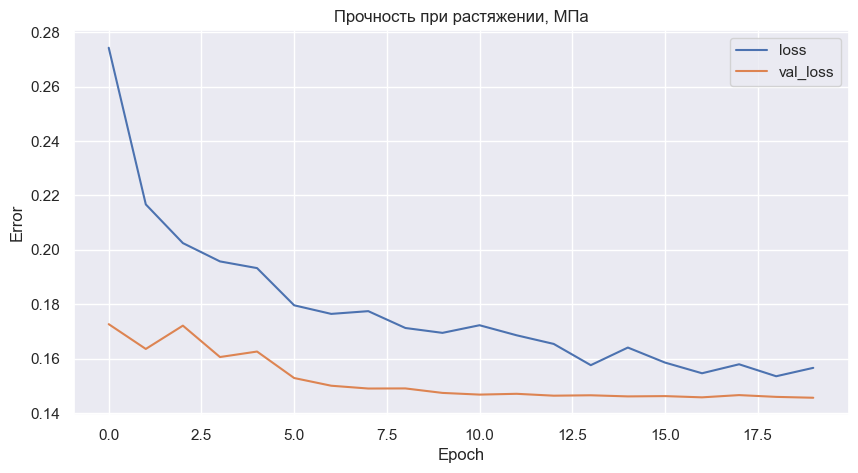

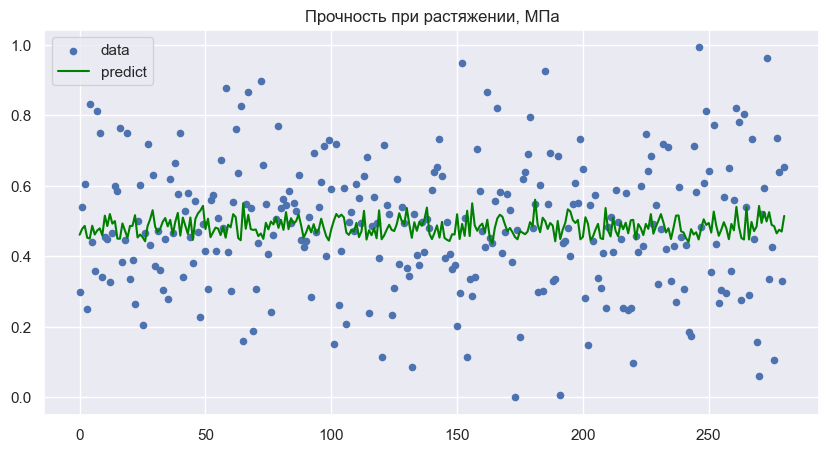

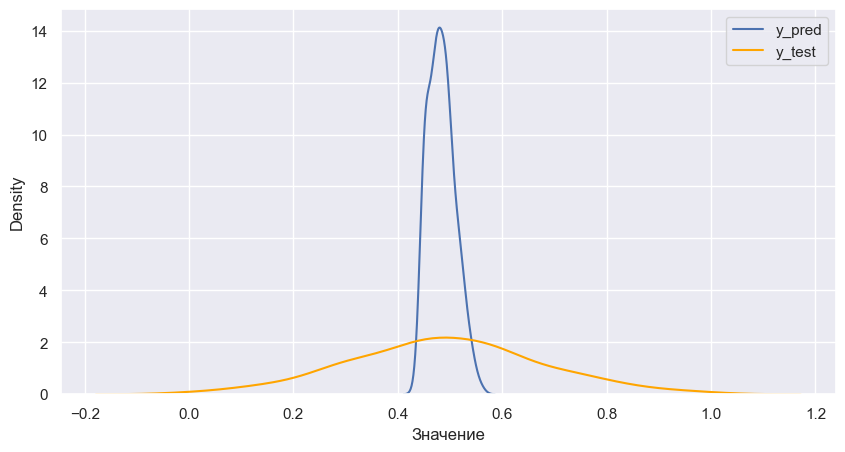

Mean squared error: 0.03445
Mean absolute error: 0.14559
Coefficient of determination:  -0.026678765192916343 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None
9/9 [==============================] - 0s 2ms/step - loss: 0.1445

Оцен

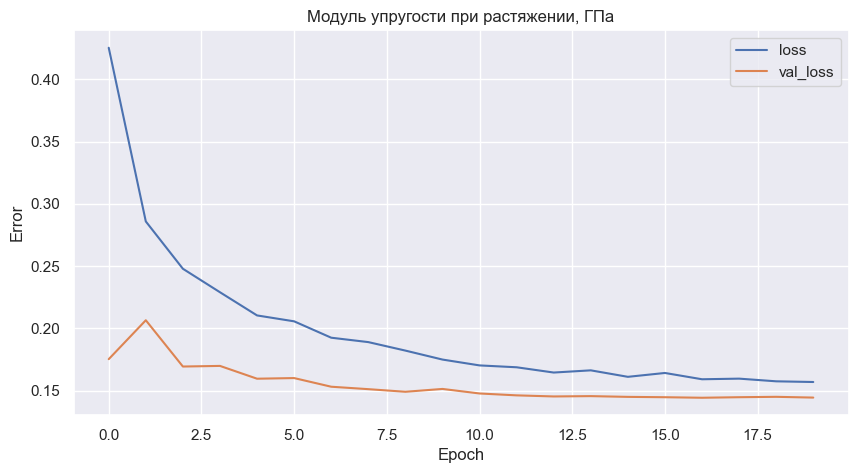

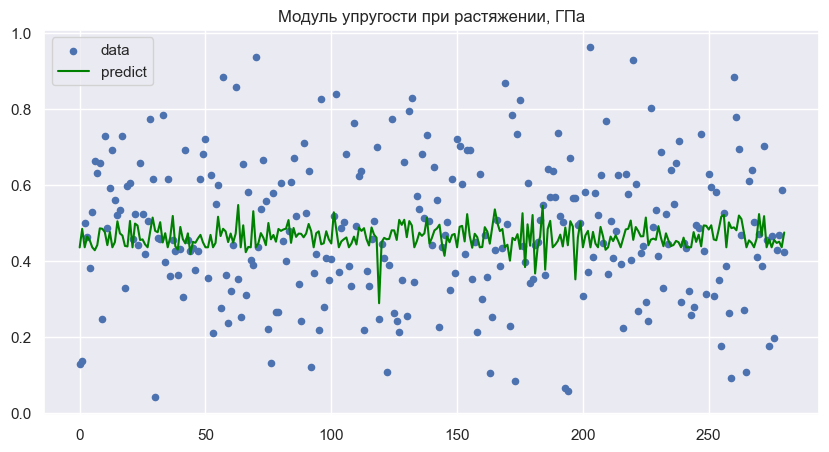

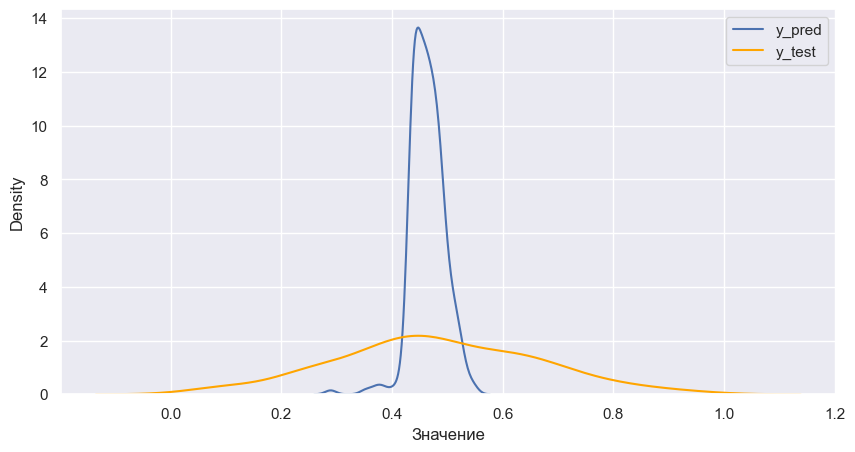

Mean squared error: 0.03332
Mean absolute error: 0.14446
Coefficient of determination:  -0.010911806381359801 



In [28]:
nn_model_12_6_1_func (['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'], norm_df)

In [30]:
def nn_model_12_6_6_1_func (y_features, df):
 
  for y_feature in y_features:
  
    #разбивка датасета на тренировочную и тестовую выборки (70/30)
    y = np.array(df[y_feature])
    X = np.array(df.drop(y_feature, axis=1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

    #модель нейронной сети
    nn_model = tf.keras.Sequential([ 
          layers.Dense(input_shape = (X_train.shape[1],), units=12, activation='relu'),  
          layers.Dense(units=6,activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(units=6, activation='relu'),
          layers.Dense(units=1, activation='linear')])
    
    print(nn_model.summary()) 

    #компиляция
    nn_model.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.0035))
    
    history = nn_model.fit(X_train, y_train,
                          epochs=20, 
                          verbose=0, 
                          validation_split = 0.3, 
                          batch_size=45,
                          validation_data = (X_test, y_test))
    
    y_pred = nn_model.predict(X_test)
    
    plt.figure(figsize=(10,5))
    plt.title(str(y_feature))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0,0.4])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

    print("\nОценка модели: ", nn_model.evaluate(X_test, y_test, verbose=1))

    # Отрисовка результата
    print('\nРезультат отработки модели')
    plt.figure(figsize=(10,5))
    plt.scatter(range(0, len(y_test)), y_test, label = 'data', s =20)
    plt.plot(range(0, len(y_test)), y_pred, label = 'predict', color = 'green')
    plt.title(str(y_feature))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=y_pred, label = 'y_pred', color='b')
    sns.kdeplot(data=y_test, label = 'y_test', color='orange')
    plt.xlabel("Значение")
    plt.legend()  
    plt.show()
    
    
    print('Mean squared error: %.5f' % mean_squared_error(y_test, y_pred))
    print('Mean absolute error: %.5f' % mean_absolute_error(y_test, y_pred))
    print('Coefficient of determination: ', r2_score(y_test, y_pred), '\n')
    
  return
     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 6)                 78        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________
None
9/9 [==============================] - 0s 2ms/step 

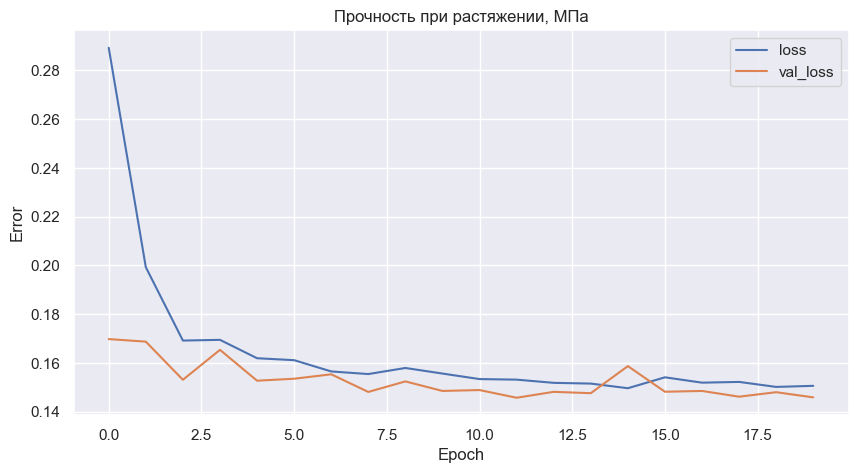

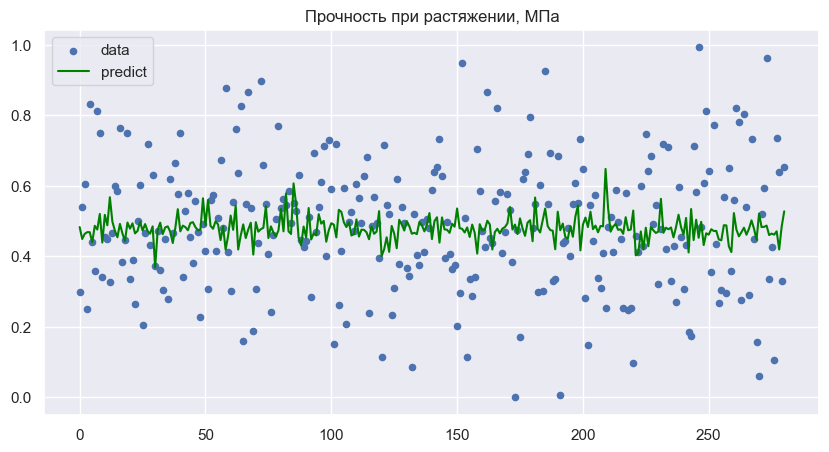

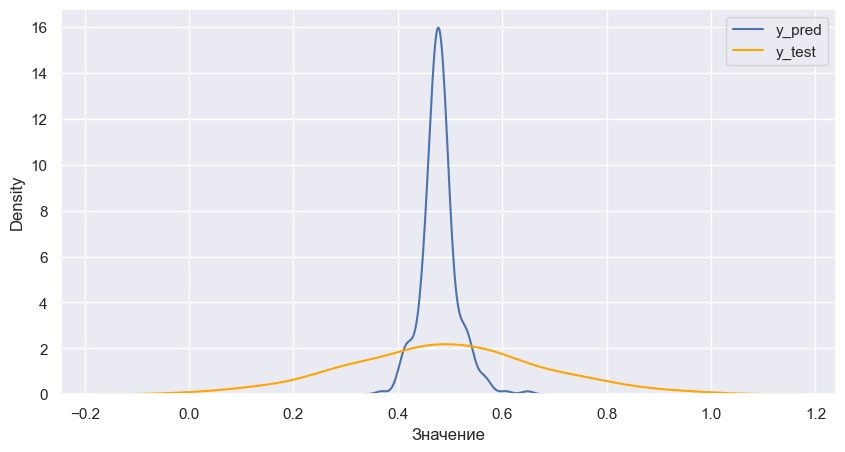

Mean squared error: 0.03509
Mean absolute error: 0.14589
Coefficient of determination:  -0.04573922103083605 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                156       
                                                                 
 dense_11 (Dense)            (None, 6)                 78        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
___________

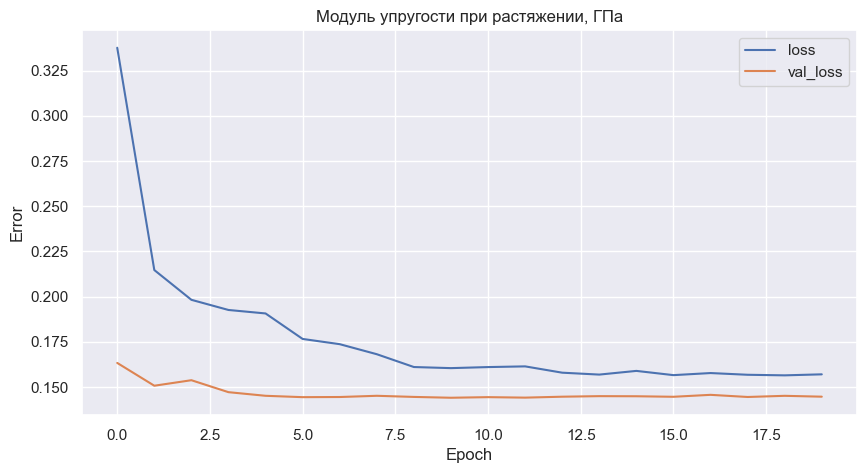

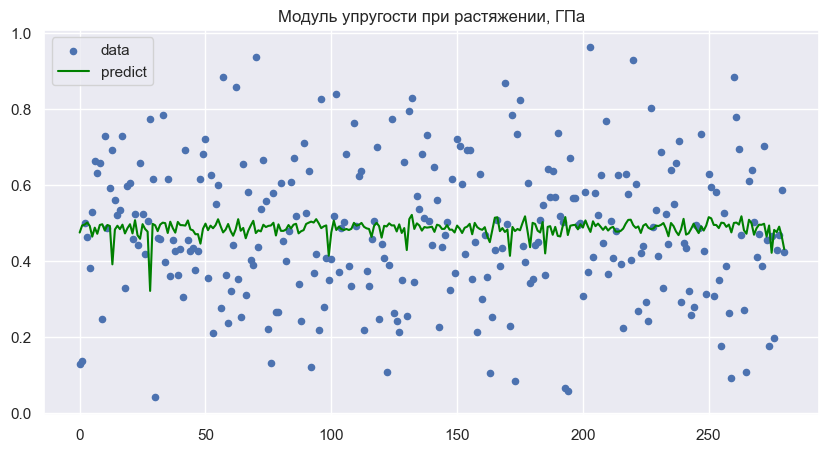

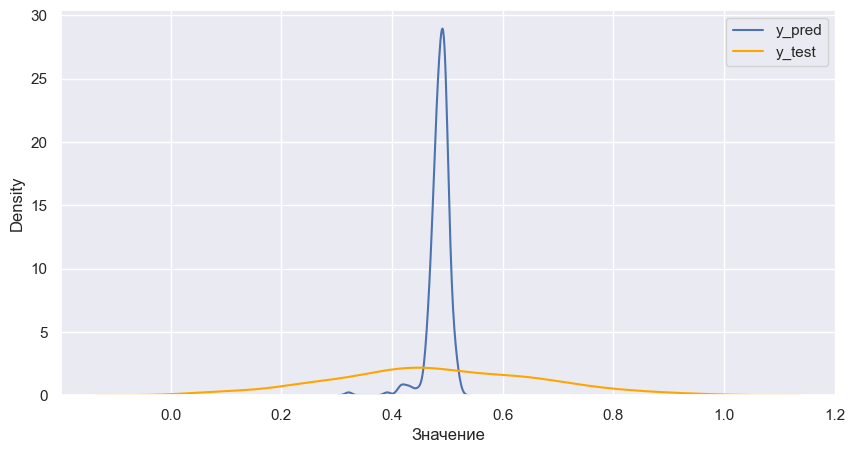

Mean squared error: 0.03316
Mean absolute error: 0.14461
Coefficient of determination:  -0.005814115765051975 



In [31]:
nn_model_12_6_6_1_func (['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'], norm_df)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                156       
                                                                 
 dense_15 (Dense)            (None, 6)                 78        
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 dense_16 (Dense)            (None, 6)                 42        
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________
None
9/9 [==============================] - 0s 2ms/step 

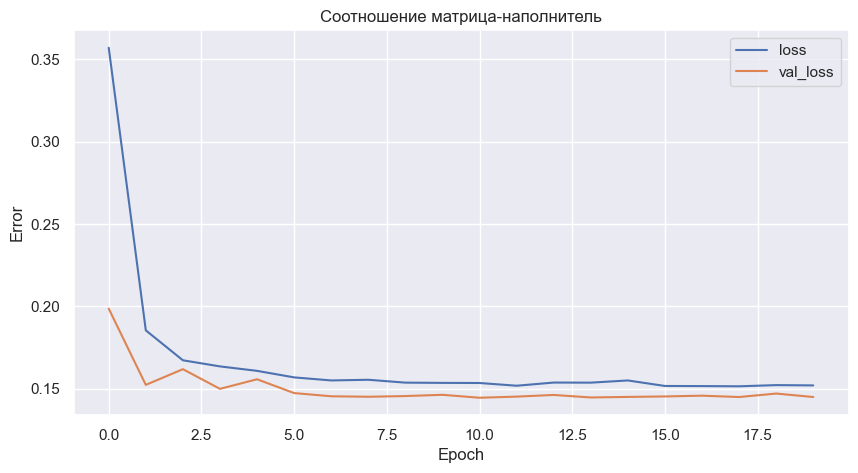

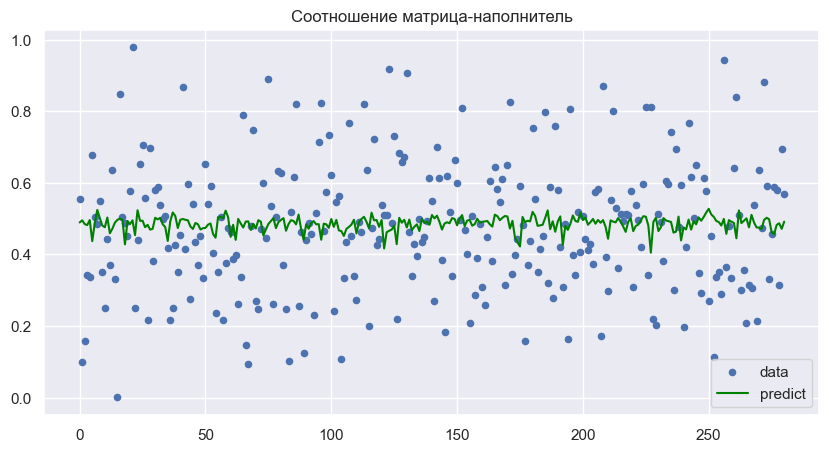

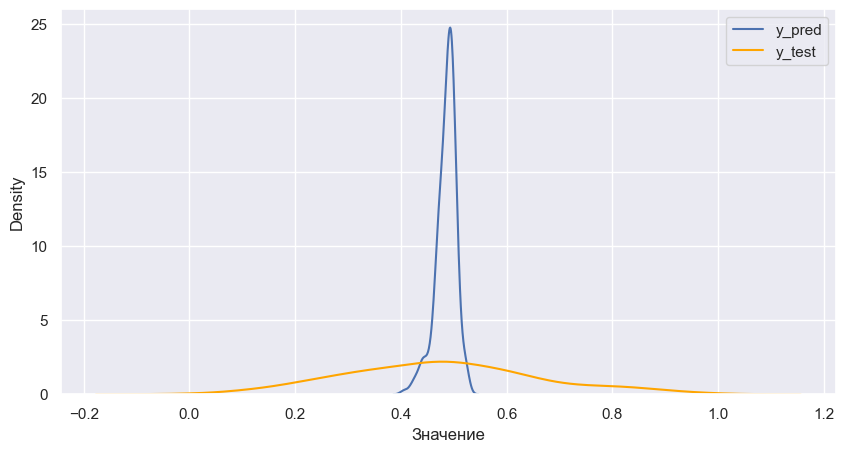

Mean squared error: 0.03367
Mean absolute error: 0.14506
Coefficient of determination:  -0.011874407106923224 



In [32]:
#разбивка датасета на тренировочную и тестовую выборки (70/30)
y = np.array(norm_df['Соотношение матрица-наполнитель'])
X = np.array(norm_df.drop('Соотношение матрица-наполнитель', axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

#модель нейронной сети
nn_model2 = tf.keras.Sequential([ 
layers.Dense(input_shape = (X_train.shape[1],), units=12, activation='relu'),  
layers.Dense(units=6,activation='relu'),
layers.Dropout(0.2),
layers.Dense(units=6, activation='relu'),
layers.Dense(units=1, activation='linear')])
    
print(nn_model2.summary()) 

#компиляция
nn_model2.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.0035))
    
history = nn_model2.fit(X_train, y_train,
                          epochs=20, 
                          verbose=0, 
                          validation_split = 0.3, 
                          batch_size=45,
                          validation_data = (X_test, y_test))
    
y_pred = nn_model2.predict(X_test)
    
plt.figure(figsize=(10,5))
plt.title(str('Соотношение матрица-наполнитель'))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.ylim([0,0.4])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

print("\nОценка модели: ", nn_model2.evaluate(X_test, y_test, verbose=1))

# Отрисовка результата
print('\nРезультат отработки модели')
plt.figure(figsize=(10,5))
plt.scatter(range(0, len(y_test)), y_test, label = 'data', s =20)
plt.plot(range(0, len(y_test)), y_pred, label = 'predict', color = 'green')
plt.title(str('Соотношение матрица-наполнитель'))
plt.legend()
plt.show()
    
plt.figure(figsize=(10,5))
sns.kdeplot(data=y_pred, label = 'y_pred', color='b')
sns.kdeplot(data=y_test, label = 'y_test', color='orange')
plt.xlabel("Значение")
plt.legend()  
plt.show()
    
    
print('Mean squared error: %.5f' % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.5f' % mean_absolute_error(y_test, y_pred))
print('Coefficient of determination: ', r2_score(y_test, y_pred), '\n')

In [33]:
#Ввод параметров и получение списка с параметрами

print("Введите параметры для прогноза соотношения 'Матрица-наполнитель'")
print("Плотность, кг/м3")
f1 = np.float64(input())
print("Модуль упругости, ГПа")
f2 = np.float64(input())
print("Количество отвердителя, м.%")
f3 = np.float64(input())
print("Содержание эпоксидных групп,%_2")
f4 = np.float64(input())
print("Температура вспышки, С_2")
f5 = np.float64(input())
print("Поверхностная плотность, г/м2")
f6 = np.float64(input())
print("Модуль упругости при растяжении, ГПа")
f7 = np.float64(input())
print("Прочность при растяжении, МПа")
f8 = np.float64(input())
print("Потребление смолы, г/м2")
f9 = np.float64(input())
print("Угол нашивки, град")
f10 = np.float64(input())
print("Шаг нашивки")
f11 = np.float64(input())
print("Плотность нашивки")
f12 = np.float64(input())

args = np.array([[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12]])


Введите параметры для прогноза соотношения 'Матрица-наполнитель'
Плотность, кг/м3


 1


Модуль упругости, ГПа


 1


Количество отвердителя, м.%


 1


Содержание эпоксидных групп,%_2


 1


Температура вспышки, С_2


 1


Поверхностная плотность, г/м2


 1


Модуль упругости при растяжении, ГПа


 1


Прочность при растяжении, МПа


 1


Потребление смолы, г/м2


 1


Угол нашивки, град


 1


Шаг нашивки


 1


Плотность нашивки


 1


In [34]:

pred = nn_model2.predict(args)

#возвращаем исходный масштаб значения
pred2 = pred * np.max(clear_df['Соотношение матрица-наполнитель']) + np.min(clear_df['Соотношение матрица-наполнитель'])

print("Рекомендуемое соотношение 'Матрица-наполнитель' =", pred2[0,0])

1/1 [==============================] - 0s 28ms/step
Рекомендуемое соотношение 'Матрица-наполнитель' = 3.8762302


In [35]:

import pickle

In [36]:

y = np.array(norm_df['Прочность при растяжении, МПа'])
X = np.array(norm_df.drop('Прочность при растяжении, МПа', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state= 42)

regr = KNeighborsRegressor(n_jobs=-1, n_neighbors=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)   


In [37]:

pickle.dump(regr, open('vkr_model.pkl', 'wb'))

In [38]:

model_load = pickle.load(open('vkr_model.pkl', 'rb'))

In [39]:

model_load.predict(X_test)

array([0.46753483, 0.4879728 , 0.48212438, 0.48767453, 0.5003076 ,
       0.47934322, 0.47206985, 0.48261569, 0.50138799, 0.48896878,
       0.48595953, 0.49363289, 0.44885037, 0.49152025, 0.48252342,
       0.50160808, 0.52368947, 0.50345588, 0.49835215, 0.46182659,
       0.49062961, 0.47362406, 0.5179132 , 0.50571862, 0.48960878,
       0.49857071, 0.48778907, 0.53469149, 0.43761599, 0.50482864,
       0.5138002 , 0.46460698, 0.45852716, 0.51153568, 0.46284894,
       0.50566518, 0.52719332, 0.48045317, 0.48440261, 0.50357407,
       0.50549362, 0.4759157 , 0.49414235, 0.49529121, 0.47217014,
       0.50158976, 0.46996911, 0.486577  , 0.49501029, 0.46055503,
       0.48713615, 0.44814941, 0.49271749, 0.50829536, 0.49551719,
       0.48158559, 0.48180535, 0.51202708, 0.49419505, 0.49013929,
       0.51020579, 0.48657647, 0.50025751, 0.51234548, 0.47190605,
       0.48655421, 0.50091722, 0.50167956, 0.51360263, 0.51384786,
       0.48403658, 0.49802473, 0.48409862, 0.48266534, 0.46714